Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus.
Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness 
and recover without requiring special treatment.  Older people, and those with underlying medical 
problems like cardiovascular disease, diabetes, chronic respiratory disease, and cancer are more 
likely to develop serious illness.

The best way to prevent and slow down transmission is to be well informed about the COVID-19 virus,
the disease it causes and how it spreads. Protect yourself and others from infection by washing your
hands or using an alcohol based rub frequently and not touching your face. 

In [3]:
# import the Library needed
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime

In [4]:
# importing the dataset online

confirmed_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_cases = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')

In [5]:
confirmed_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/25/21  6/26/21  6/27/21  \
0        0        0        0        0  ...   111592   111592   111592   
1        0        0        0        0  ...   132506   132509   132512   
2        0        0        0        0  ...   137772   138113   138465   
3        0        0        0        0  ...    13882    13882    13882   
4        0        0        0        0  ...    38371    38528    38556   

   6/28/21  6/29/21  6/30/21  7/1/21  7/2/21  7/3/21  7/4/21  
0   115751   117158   118659  120216  120216  120216  120216  
1   132513   132514   132521  132523  132526  132534  132535  
2   138840   139229   139626  140075  140550  141007  141471  
3    13882    13900    13911   13918   13918   13918   13918  
4    38613    38682    38849   38965   39089   39172   39230  

[5 rows x 534 columns]

# Exploring the dataset

In [7]:
deaths_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  6/25/21  6/26/21  6/27/21  \
0        0        0        0        0  ...     4519     4519     4519   
1        0        0        0        0  ...     2455     2456     2456   
2        0        0        0        0  ...     3678     3685     3693   
3        0        0        0        0  ...      127      127      127   
4        0        0        0        0  ...      883      887      889   

   6/28/21  6/29/21  6/30/21  7/1/21  7/2/21  7/3/21  7/4/21  
0     4730     4794     4871    4962    4962    4962    4962  
1     2456     2456     2456    2456    2456    2456    2456  
2     3699     3708     3716    3726    3735    3745    3755  
3      127      127      127     127     127     127     127  
4      891      894      900     903     906     910     913  

[5 rows x 534 columns]

In [9]:
cols = confirmed_cases.keys()
cols

Index(['Province/State', 'Country/Region', 'Lat', 'Long', '1/22/20', '1/23/20',
       '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       ...
       '6/25/21', '6/26/21', '6/27/21', '6/28/21', '6/29/21', '6/30/21',
       '7/1/21', '7/2/21', '7/3/21', '7/4/21'],
      dtype='object', length=534)

In [11]:
confirmed = confirmed_cases.loc[:, cols[4]:cols[-1]]
deaths = deaths_cases.loc[:, cols[4]:cols[-1]]
confirmed


1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
274        0        2        2        2        2        2        2        2   
275        0        0        0        0        0        0        0        0   
276        0        0        0        0        0        0        0        0   
277        0        0        0        0        0        0        0        0   
278        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  6/25/21  6/26/21  6/27/21  6/28/21  6/29/21  \
0          0        0  ...   111592   111592   111592   115751   117158   
1          0        0  ...   132506   132509   132512   132513   132514   
2          0        0  ...   137772   138113   138465   138840   139229   
3          0        0  ...    13882    13882    13882    13882    13900   
4          0        0  ...    38371    38528    38556    38613    38682   
..       ...      ...  ...      ...      ...      ...      ...      ...   
274        2        2  ...    14537    15325    15740    16136    16507   
275        0        0  ...   313520   313520   313721   313851   313851   
276        0        0  ...     6905     6906     6908     6909     6918   
277        0        0  ...   143215   146031   148568   149661   152056   
278        0        0  ...    45217    46018    46442    47284    48533   

     6/30/21  7/1/21  7/2/21  7/3/21  7/4/21  
0     118659  120216  120216  120216  120216  
1     132521  132523  132526  132534  132535  
2     139626  140075  140550  141007  141471  
3      13911   13918   13918   13918   13918  
4      38849   38965   39089   39172   39230  
..       ...     ...     ...     ...     ...  
274    17052   17727   18121   19310   20261  
275   314167  314288  314409  314492  314569  
276     6920    6923    6924    6926    6929  
277   154948  157832  160613  162487  164282  
278    49864   51221   52663   53665   54474  

[279 rows x 530 columns]

In [12]:
deaths

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
274        0        0        0        0        0        0        0        0   
275        0        0        0        0        0        0        0        0   
276        0        0        0        0        0        0        0        0   
277        0        0        0        0        0        0        0        0   
278        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  6/25/21  6/26/21  6/27/21  6/28/21  6/29/21  \
0          0        0  ...     4519     4519     4519     4730     4794   
1          0        0  ...     2455     2456     2456     2456     2456   
2          0        0  ...     3678     3685     3693     3699     3708   
3          0        0  ...      127      127      127      127      127   
4          0        0  ...      883      887      889      891      894   
..       ...      ...  ...      ...      ...      ...      ...      ...   
274        0        0  ...       74       74       76       78       80   
275        0        0  ...     3556     3556     3559     3561     3561   
276        0        0  ...     1357     1358     1360     1361     1361   
277        0        0  ...     1915     1967     2022     2091     2138   
278        0        0  ...     1721     1725     1736     1749     1761   

     6/30/21  7/1/21  7/2/21  7/3/21  7/4/21  
0       4871    4962    4962    4962    4962  
1       2456    2456    2456    2456    2456  
2       3716    3726    3735    3745    3755  
3        127     127     127     127     127  
4        900     903     906     910     913  
..       ...     ...     ...     ...     ...  
274       81      81      84      84      86  
275     3563    3565    3570    3570    3573  
276     1361    1361    1361    1361    1361  
277     2199    2271    2341    2397    2443  
278     1789    1808    1841    1859    1878  

[279 rows x 530 columns]

In [24]:
confirmed_cases.describe()

Lat        Long     1/22/20     1/23/20     1/24/20     1/25/20  \
count  277.000000  277.000000  279.000000  279.000000  279.000000  279.000000   
mean    20.305266   22.500100    1.996416    2.347670    3.372760    5.136201   
std     25.206138   75.408236   26.637656   26.735265   33.284971   46.326447   
min    -51.796300 -178.116500    0.000000    0.000000    0.000000    0.000000   
25%      4.860416  -23.041800    0.000000    0.000000    0.000000    0.000000   
50%     21.521757   20.939400    0.000000    0.000000    0.000000    0.000000   
75%     40.463667   85.240100    0.000000    0.000000    0.000000    0.000000   
max     71.706900  178.065000  444.000000  444.000000  549.000000  761.000000   

           1/26/20      1/27/20      1/28/20      1/29/20  ...       6/25/21  \
count   279.000000   279.000000   279.000000   279.000000  ...  2.790000e+02   
mean      7.591398    10.491039    19.992832    22.103943  ...  6.466707e+05   
std      64.742529    87.231432   214.047295   215.362435  ...  3.013713e+06   
min       0.000000     0.000000     0.000000     0.000000  ...  0.000000e+00   
25%       0.000000     0.000000     0.000000     0.000000  ...  1.350500e+03   
50%       0.000000     0.000000     0.000000     0.000000  ...  1.940500e+04   
75%       0.000000     0.000000     0.000000     0.000000  ...  2.658225e+05   
max    1058.000000  1423.000000  3554.000000  3554.000000  ...  3.361420e+07   

            6/26/21       6/27/21       6/28/21       6/29/21       6/30/21  \
count  2.790000e+02  2.790000e+02  2.790000e+02  2.790000e+02  2.790000e+02   
mean   6.479712e+05  6.490819e+05  6.502716e+05  6.516506e+05  6.530551e+05   
std    3.017686e+06  3.020690e+06  3.023794e+06  3.027853e+06  3.031668e+06   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    1.350500e+03  1.350500e+03  1.351000e+03  1.351000e+03  1.351500e+03   
50%    1.940500e+04  1.940500e+04  1.941200e+04  1.941200e+04  1.941200e+04   
75%    2.666720e+05  2.674410e+05  2.675560e+05  2.685950e+05  2.702265e+05   
max    3.362150e+07  3.362542e+07  3.364050e+07  3.365210e+07  3.366497e+07   

             7/1/21        7/2/21        7/3/21        7/4/21  
count  2.790000e+02  2.790000e+02  2.790000e+02  2.790000e+02  
mean   6.546286e+05  6.562163e+05  6.575606e+05  6.587162e+05  
std    3.035983e+06  3.040800e+06  3.044287e+06  3.047004e+06  
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  
25%    1.351500e+03  1.351500e+03  1.351500e+03  1.351500e+03  
50%    1.941200e+04  1.941200e+04  1.941200e+04  2.026100e+04  
75%    2.716440e+05  2.721085e+05  2.750560e+05  2.758005e+05  
max    3.367943e+07  3.370913e+07  3.371387e+07  3.371757e+07  

[8 rows x 532 columns]

In [27]:
print("Size/Shape of the dataset: ",confirmed_cases.shape)
print("Checking for null values:\n", confirmed_cases.isnull().sum())
print("Checking Data-type of each column:\n", confirmed_cases)

Size/Shape of the dataset:  (279, 534)
Checking for null values:
 Province/State    192
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
6/30/21             0
7/1/21              0
7/2/21              0
7/3/21              0
7/4/21              0
Length: 534, dtype: int64
Checking Data-type of each column:
     Province/State      Country/Region        Lat        Long  1/22/20  \
0              NaN         Afghanistan  33.939110   67.709953        0   
1              NaN             Albania  41.153300   20.168300        0   
2              NaN             Algeria  28.033900    1.659600        0   
3              NaN             Andorra  42.506300    1.521800        0   
4              NaN              Angola -11.202700   17.873900        0   
..             ...                 ...        ...         ...      ...   
274            NaN             Vietnam  14.058324  108.277199        0   
275            NaN  West Bank and Gaza

In [14]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    
    # calculate the mortality rate
    mortality_rate.append(death_sum/confirmed_sum)

In [18]:
confirmed_sum, death_sum

(183781831, 3977058)

In [20]:
mortality_rate

[0.03052064631956912,
 0.02748091603053435,
 0.02763018065887354,
 0.02930914166085136,
 0.02644003777148253,
 0.02801503245644004,
 0.023485120114736465,
 0.021566401816118047,
 0.020765027322404372,
 0.021456633423995165,
 0.021515201860774213,
 0.021564305712753917,
 0.021421028812792276,
 0.020587496861662065,
 0.02040299533335745,
 0.020582410804142453,
 0.020903593441097802,
 0.02170751413950983,
 0.0225597609561753,
 0.02368537959737193,
 0.024837651469505256,
 0.024718653960954254,
 0.02270544201914478,
 0.022762259187852157,
 0.02412674506169264,
 0.024847336281322383,
 0.0254947454619899,
 0.026719182456887376,
 0.028062708190133772,
 0.029496667191518396,
 0.029307270858005493,
 0.031284191241953134,
 0.031272948266693676,
 0.03306263042767707,
 0.03370688690157838,
 0.03405180888714117,
 0.03401179655772578,
 0.03415277810798602,
 0.03420413193354493,
 0.03389370319252438,
 0.03413479093132102,
 0.0339890933732024,
 0.034162827065775246,
 0.0341421143847487,
 0.033930374596

# Getting daily increases and moving averages

In [28]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

def moving_average(data, window_size):
    moving_average = []
    for i in range(len(data)):
        if i + window_size < len(data):
            moving_average.append(np.mean(data[i:i+window_size]))
        else:
            moving_average.append(np.mean(data[i:len(data)]))
    return moving_average

# window size
window = 7

# confirmed cases
world_daily_increase = daily_increase(world_cases)
world_confirmed_avg= moving_average(world_cases, window)
world_daily_increase_avg = moving_average(world_daily_increase, window)

# deaths
world_daily_death = daily_increase(total_deaths)
world_death_avg = moving_average(total_deaths, window)
world_daily_death_avg = moving_average(world_daily_death, window)



In [29]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)

In [31]:
# Future forcasting
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-10]

In [33]:
# Convert integer into datetime 
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [34]:
# slightly modify the data to fit the model better (regression models cannot pick the pattern)
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22[50:], world_cases[50:], test_size=0.03, shuffle=False) 

# Model for predicting # of confirmed cases. I will be using support vector machine, bayesian ridge , and linear regression. 

In [35]:
# svm_confirmed = svm_search.best_estimator_
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=3, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

C:\Users\dba\Desktop\sample_project\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MAE: 35190581.14331751
MSE: 1250654807803569.5


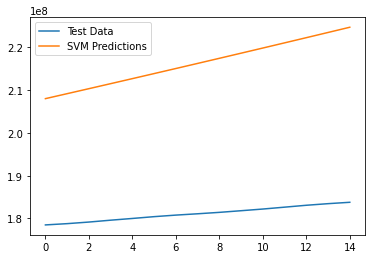

In [36]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [37]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=4)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

bayesian_poly = PolynomialFeatures(degree=5)
bayesian_poly_X_train_confirmed = bayesian_poly.fit_transform(X_train_confirmed)
bayesian_poly_X_test_confirmed = bayesian_poly.fit_transform(X_test_confirmed)
bayesian_poly_future_forcast = bayesian_poly.fit_transform(future_forcast)

In [38]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 1278170.0916251182
MSE: 1759056063278.6953


In [39]:
print(linear_model.coef_)

[[ 1.55809171e+06 -1.31009631e+04 -8.56878529e+01  3.85993836e+00
  -4.55199164e-03]]


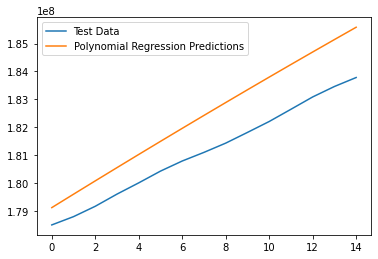

In [40]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [41]:
# bayesian ridge polynomial regression
tol = [1e-6, 1e-5, 1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4, 1e-3]
normalize = [True, False]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2, 
                 'normalize' : normalize}

bayesian = BayesianRidge(fit_intercept=False)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(bayesian_poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


C:\Users\dba\Desktop\sample_project\env\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


RandomizedSearchCV(cv=3, estimator=BayesianRidge(fit_intercept=False),
                   n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05, 0.0001,
                                                    0.001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'lambda_2': [1e-07, 1e-06, 1e-05,
                                                     0.0001, 0.001],
                                        'normalize': [True, False],
                                        'tol': [1e-06, 1e-05, 0.0001, 0.001,
                                                0.01]},
                   return_train_score=True, scoring='neg_mean_squared_error',
                   verbose=1)

In [42]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(bayesian_poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(bayesian_poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 1103633.771455272
MSE: 1304563304667.211


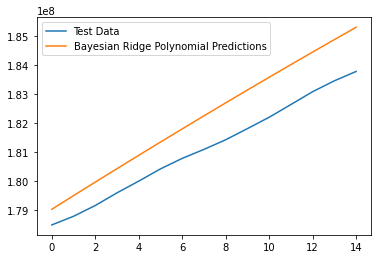

In [45]:
plt.plot(y_test_confirmed);
plt.plot(test_bayesian_pred);
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Predictions']);

# This is the overview of Covid-19 in the world Graphing. The number of confirmed cases, deaths, and mortality rate (CFR). .This gives us a big picture of the ongoing pandemic

In [46]:
# helper method for flattening the data, so it can be displayed on a bar graph 
def flatten(arr):
    a = [] 
    arr = arr.tolist()
    for i in arr:
        a.append(i[0])
    return a

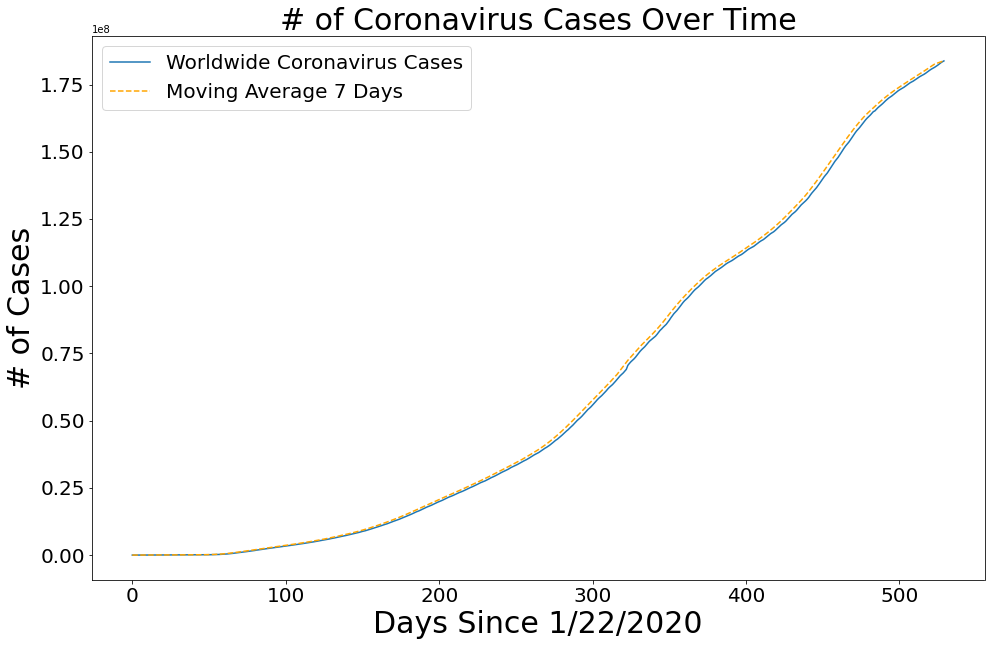

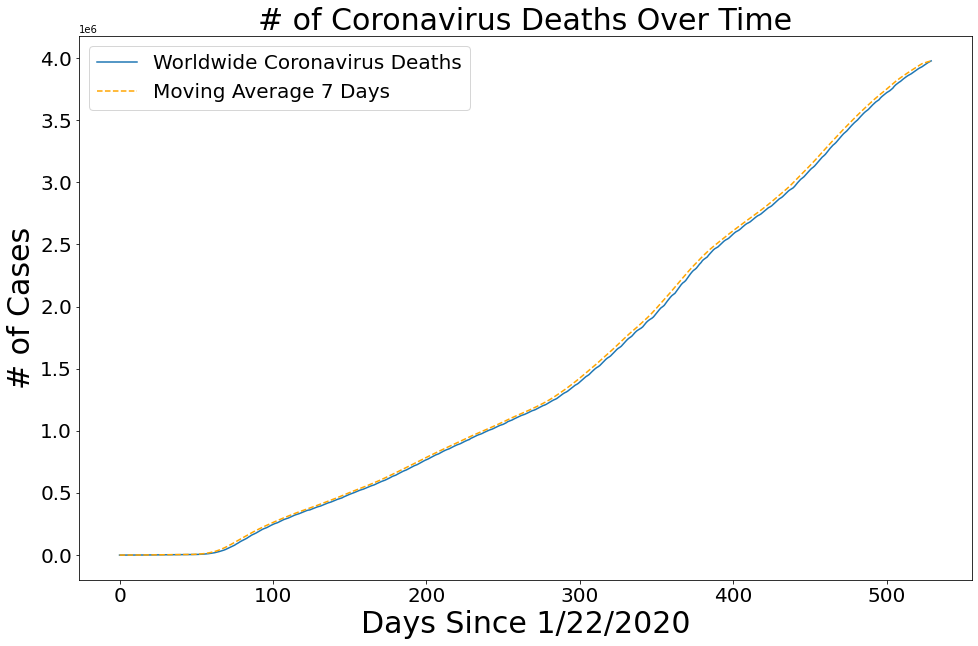

In [47]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, world_cases)
plt.plot(adjusted_dates, world_confirmed_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Cases', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, total_deaths)
plt.plot(adjusted_dates, world_death_avg, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Worldwide Coronavirus Deaths', 'Moving Average {} Days'.format(window)], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

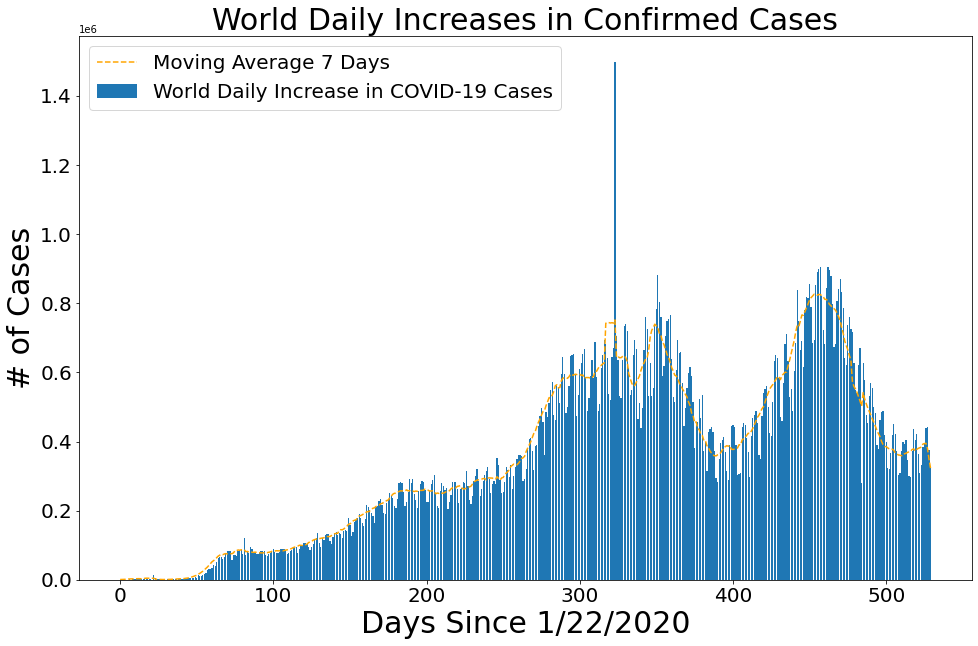

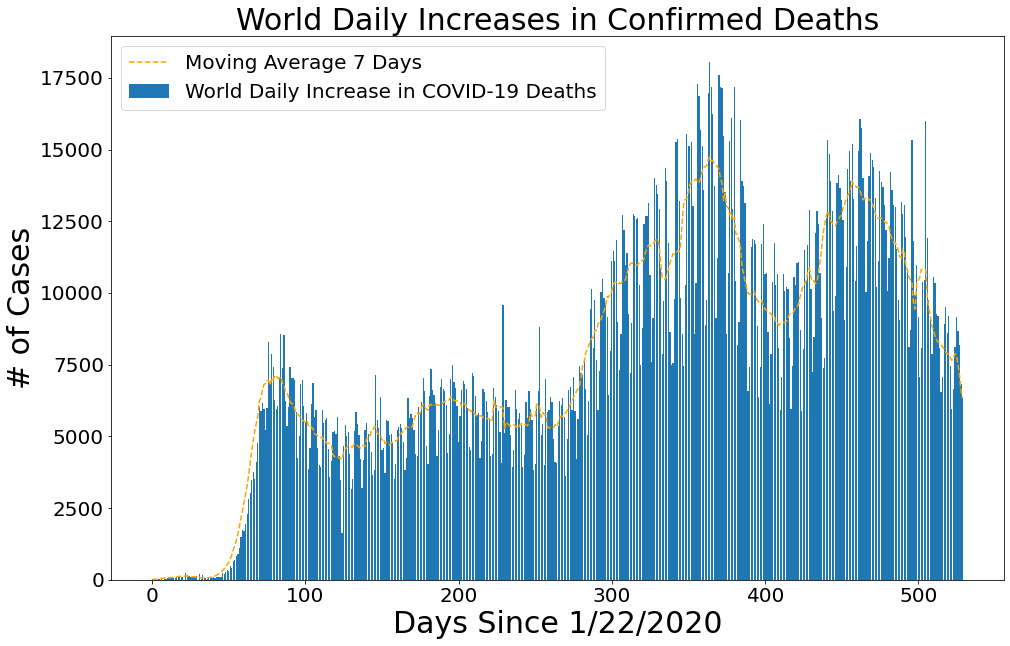

In [48]:
plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_increase)
plt.plot(adjusted_dates, world_daily_increase_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Cases'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.bar(adjusted_dates, world_daily_death)
plt.plot(adjusted_dates, world_daily_death_avg, color='orange', linestyle='dashed')
plt.title('World Daily Increases in Confirmed Deaths', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Moving Average {} Days'.format(window), 'World Daily Increase in COVID-19 Deaths'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


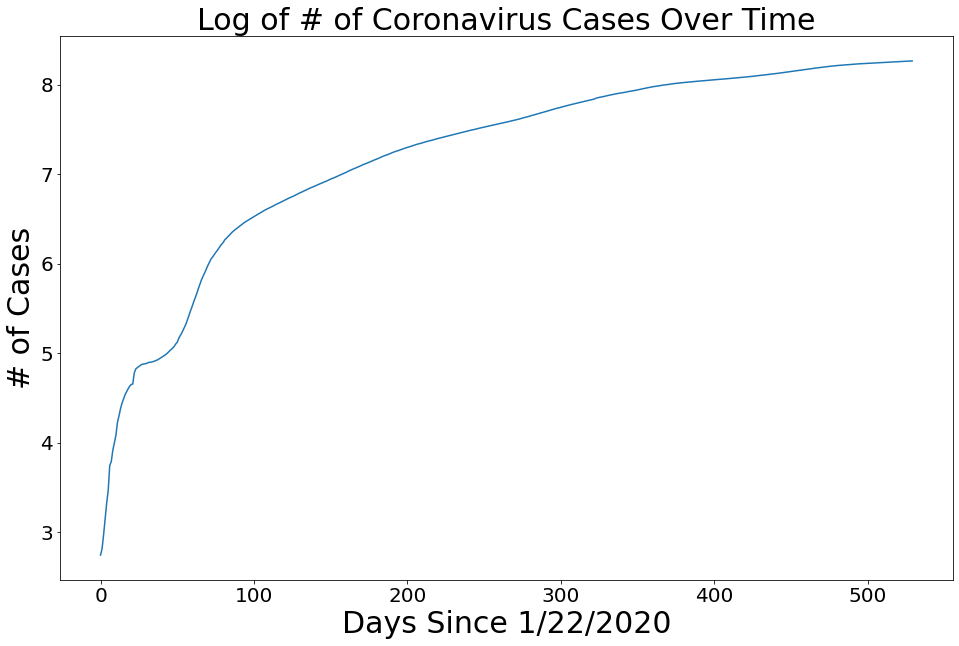

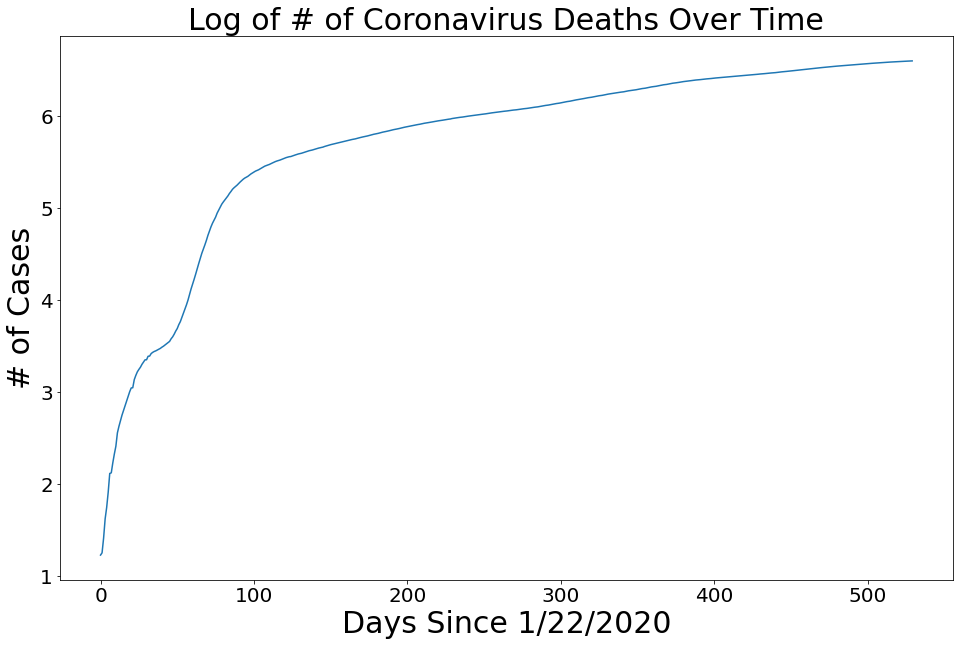

In [49]:
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, np.log10(total_deaths))
plt.title('Log of # of Coronavirus Deaths Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [54]:
def country_plot(x, y1, y2, y3, country):
    # window is set as 14 in in the beginning of the notebook 
    confirmed_avg = moving_average(y1, window)
    confirmed_increase_avg = moving_average(y2, window)
    death_increase_avg = moving_average(y3, window)

    
    plt.figure(figsize=(16, 10))
    plt.plot(x, y1)
    plt.plot(x, confirmed_avg, color='red', linestyle='dashed')
    plt.legend(['{} Confirmed Cases'.format(country), 'Moving Average {} Days'.format(window)], prop={'size': 20})
    plt.title('{} Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y2)
    plt.plot(x, confirmed_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Cases'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Confirmed Cases'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

    plt.figure(figsize=(16, 10))
    plt.bar(x, y3)
    plt.plot(x, death_increase_avg, color='red', linestyle='dashed')
    plt.legend(['Moving Average {} Days'.format(window), '{} Daily Increase in Confirmed Deaths'.format(country)], prop={'size': 20})
    plt.title('{} Daily Increases in Deaths'.format(country), size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()


      
# helper function for getting country's cases, deaths, and recoveries        
def get_country_info(country_name):
    country_cases = []
    country_deaths = []

    
    for i in dates:
        country_cases.append(confirmed_cases[confirmed_cases['Country/Region']==country_name][i].sum())
        country_deaths.append(deaths_cases[deaths_cases['Country/Region']==country_name][i].sum())
    return (country_cases, country_deaths)
    
    
def country_visualizations(country_name):
    country_info = get_country_info(country_name)
    country_cases = country_info[0]
    country_deaths = country_info[1]
    
    country_daily_increase = daily_increase(country_cases)
    country_daily_death = daily_increase(country_deaths)

    
    country_plot(adjusted_dates, country_cases, country_daily_increase, country_daily_death, country_name)
    

# This is the overview of Covid-19 in the Southern African Development Community (SADC) 

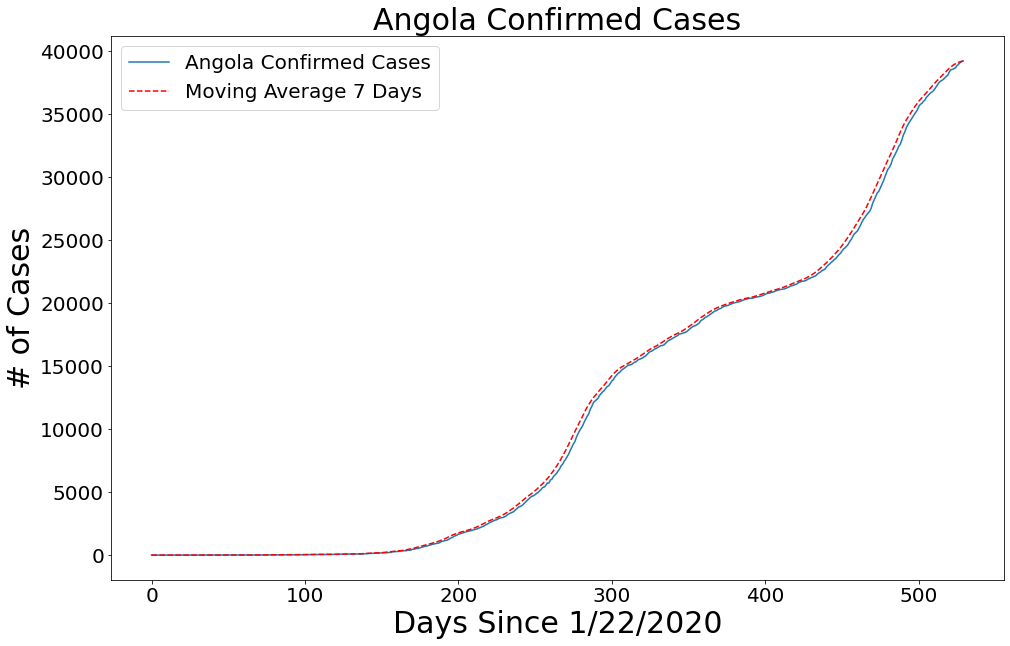

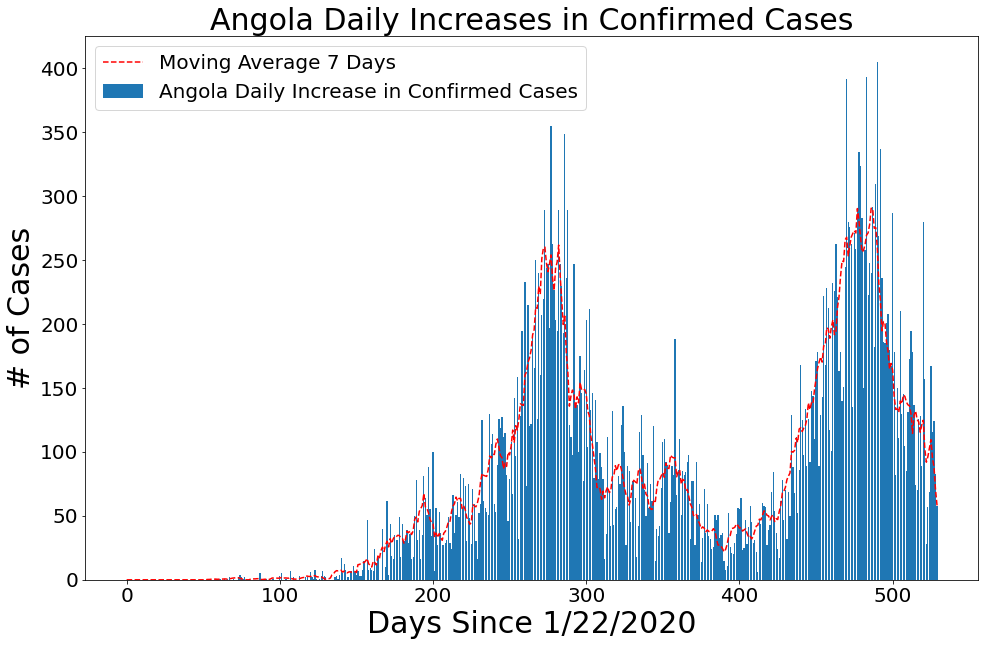

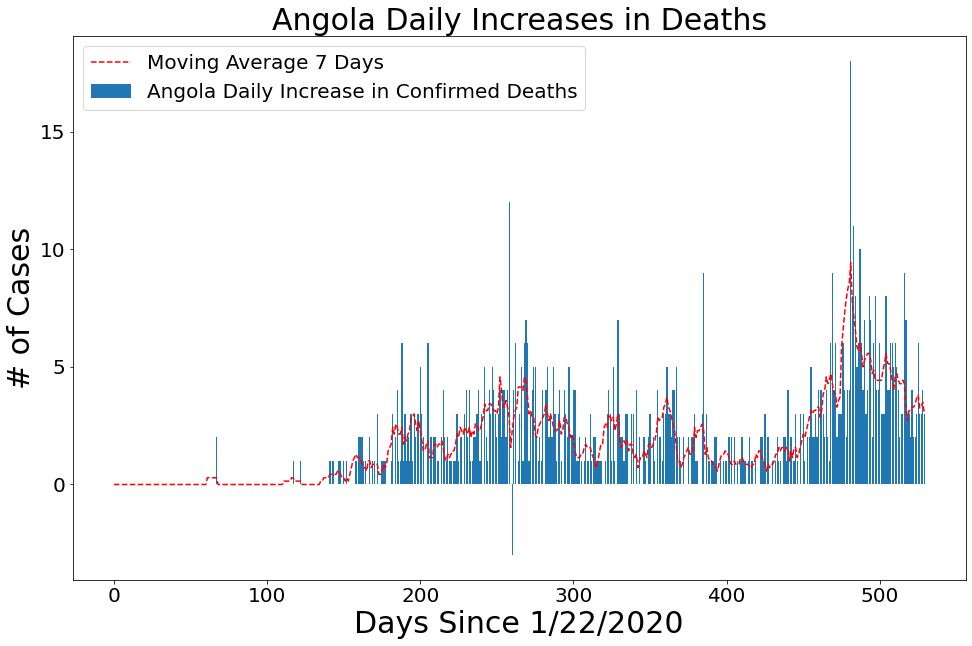

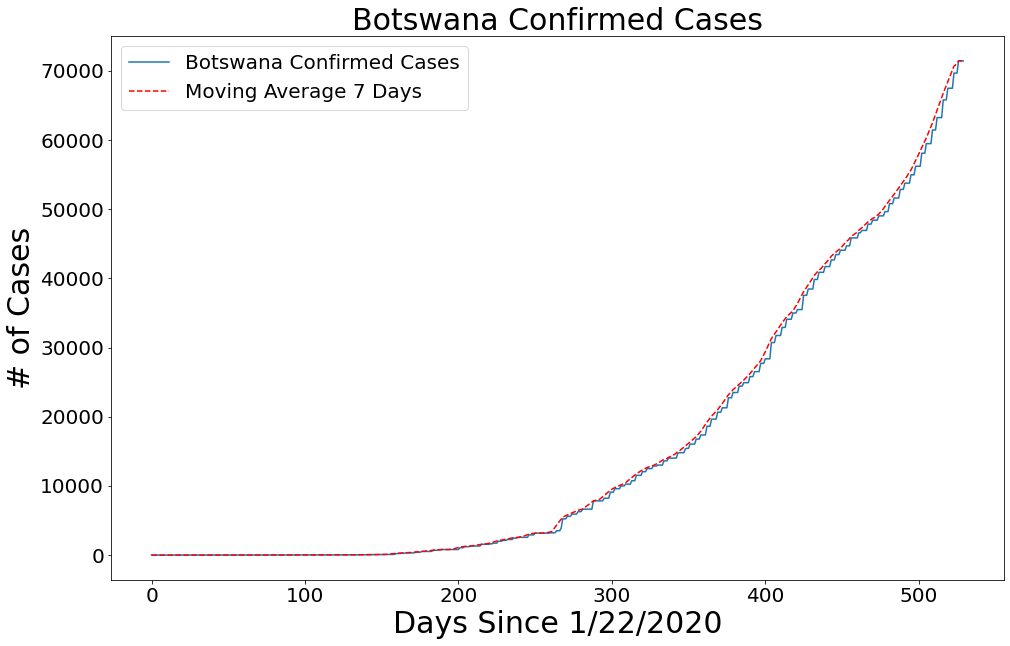

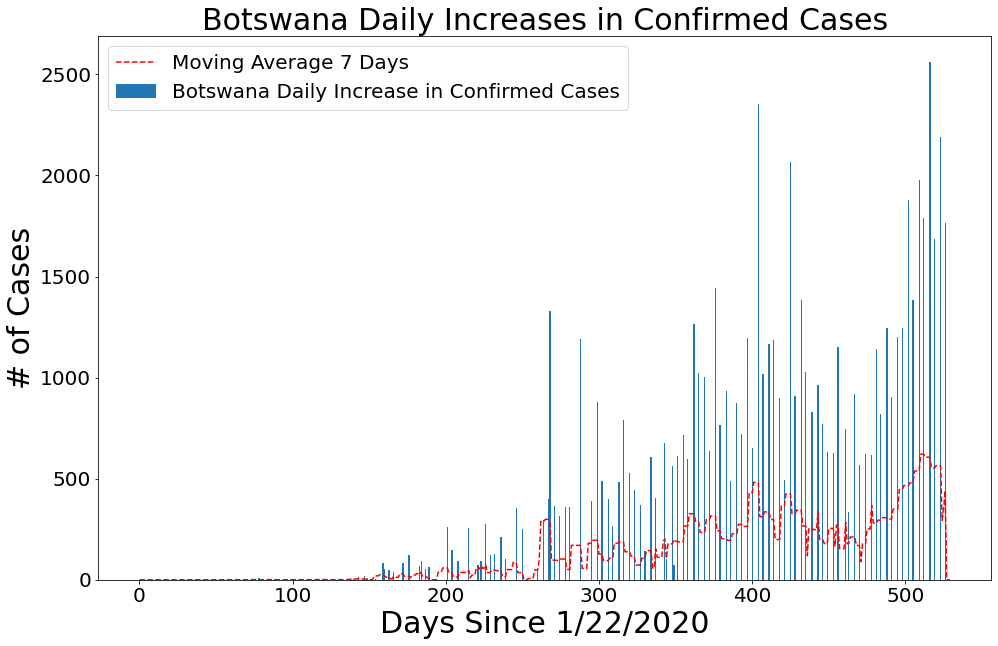

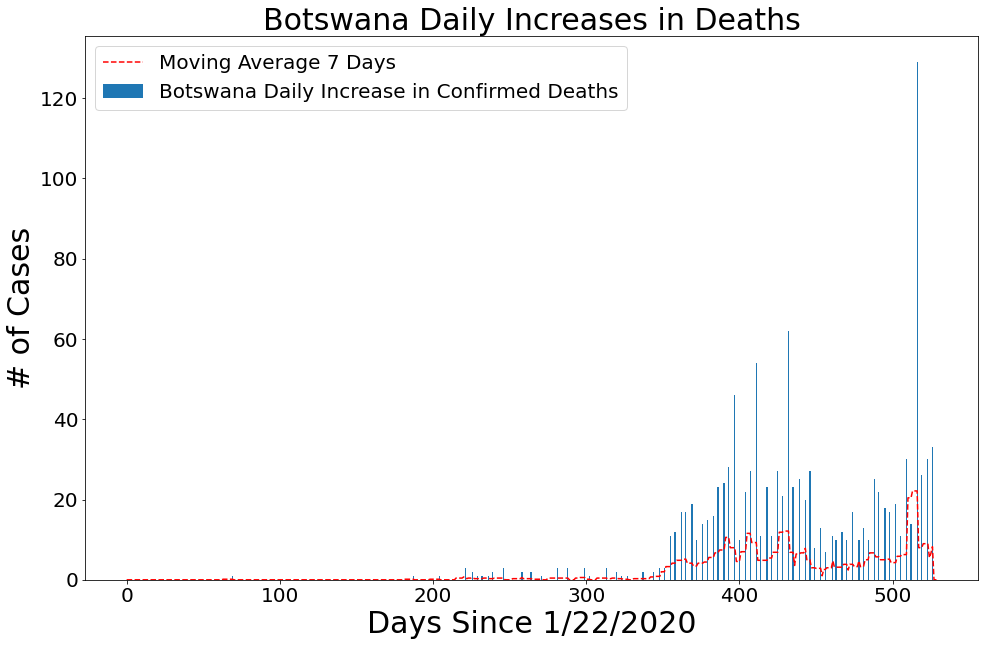

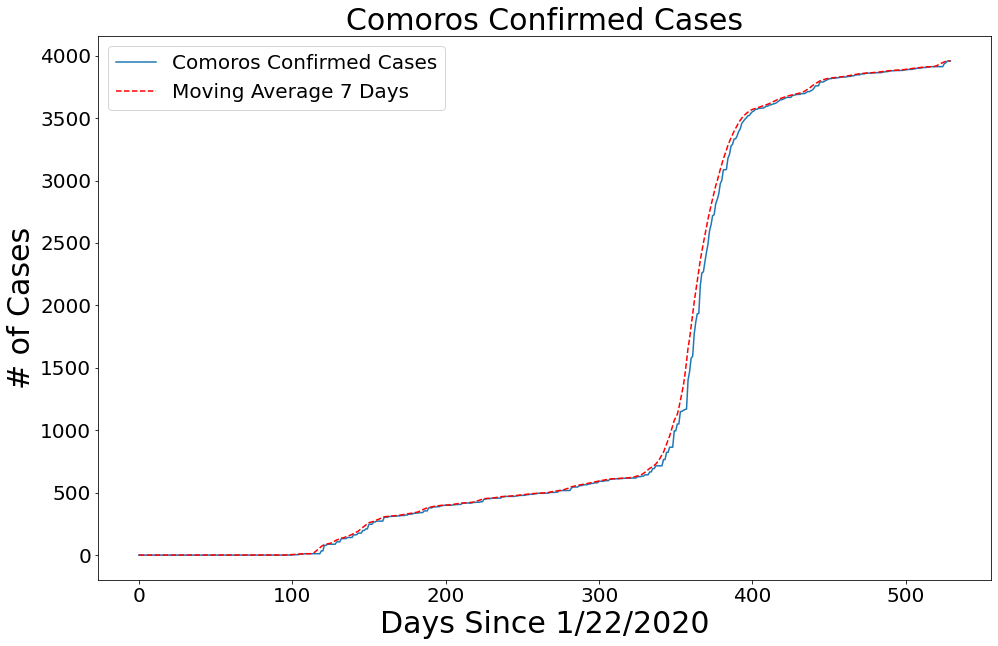

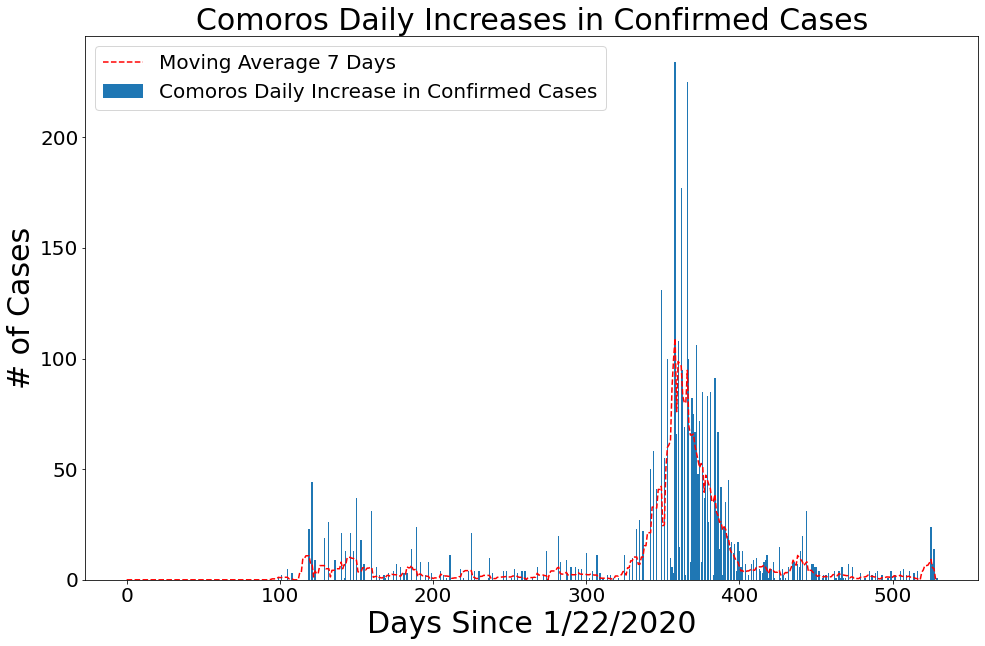

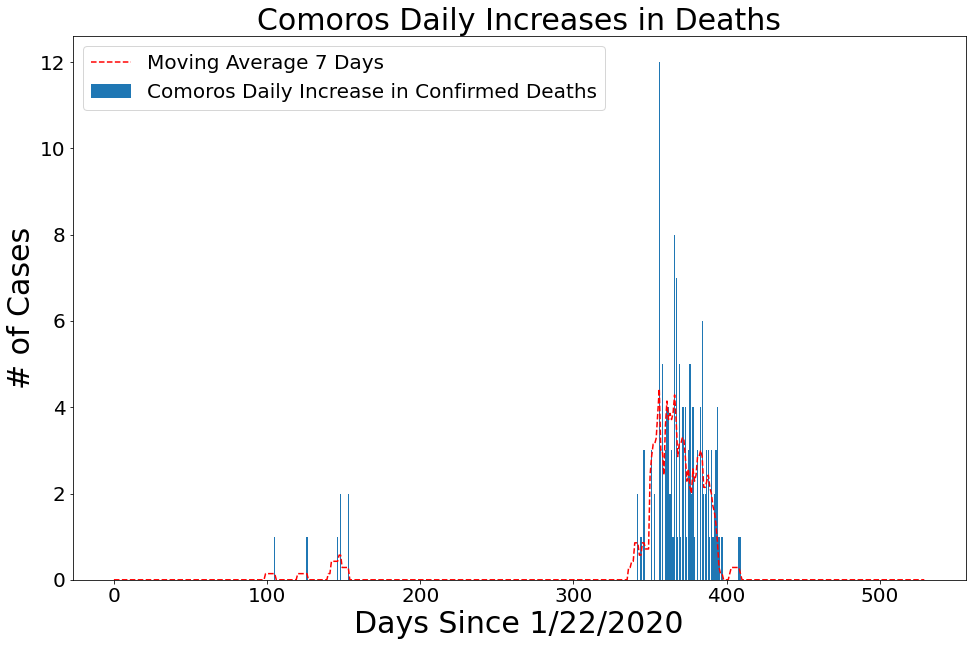

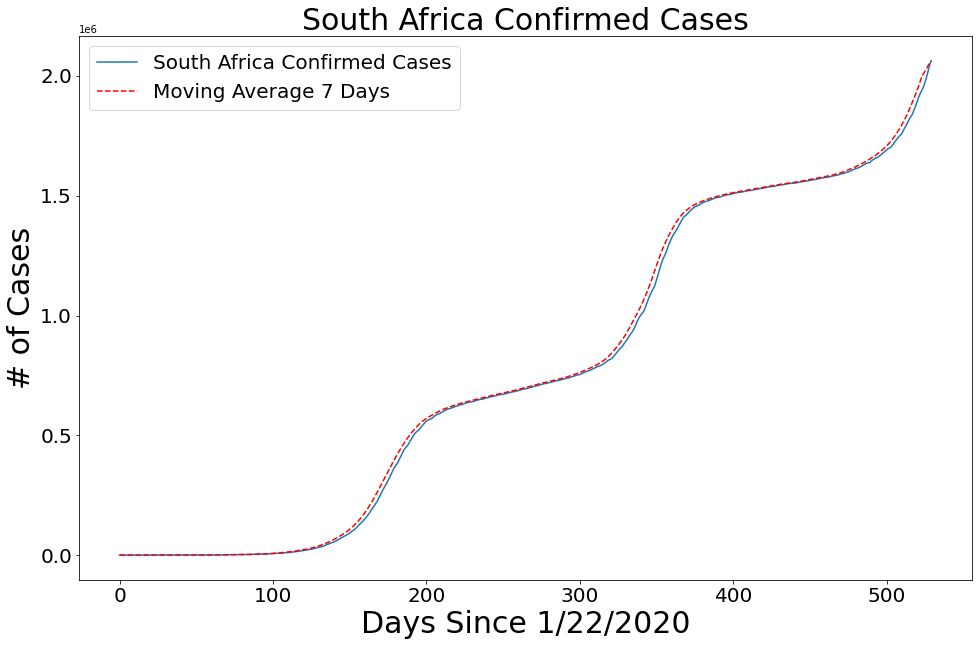

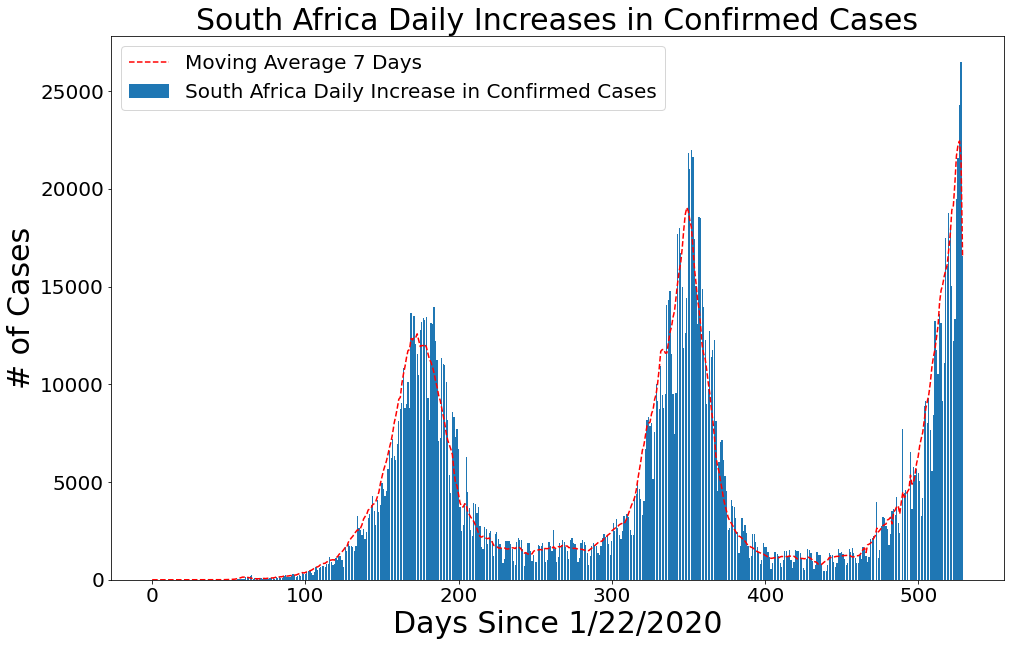

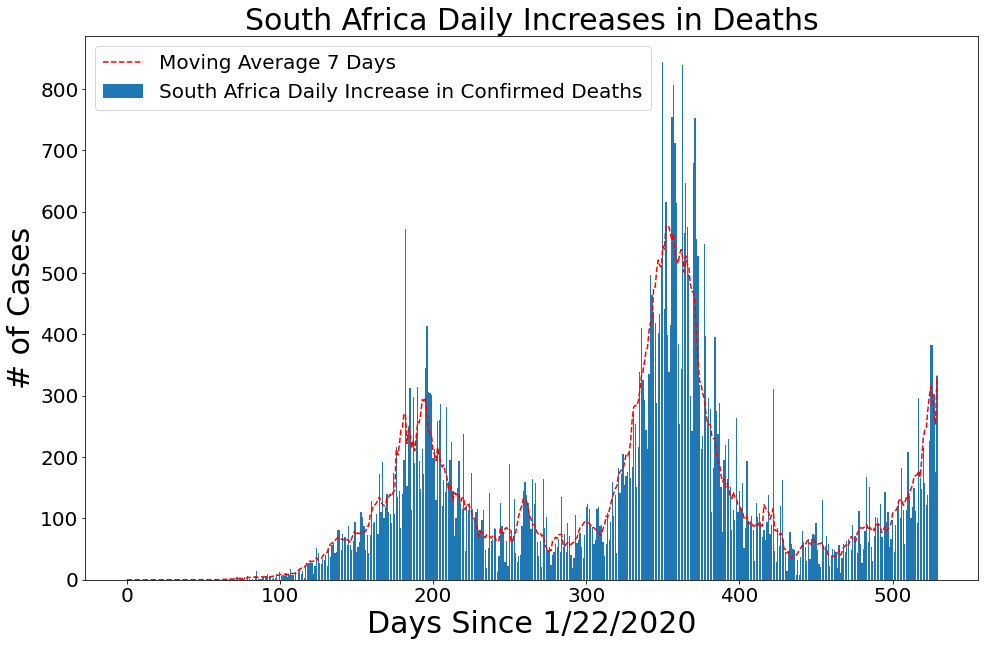

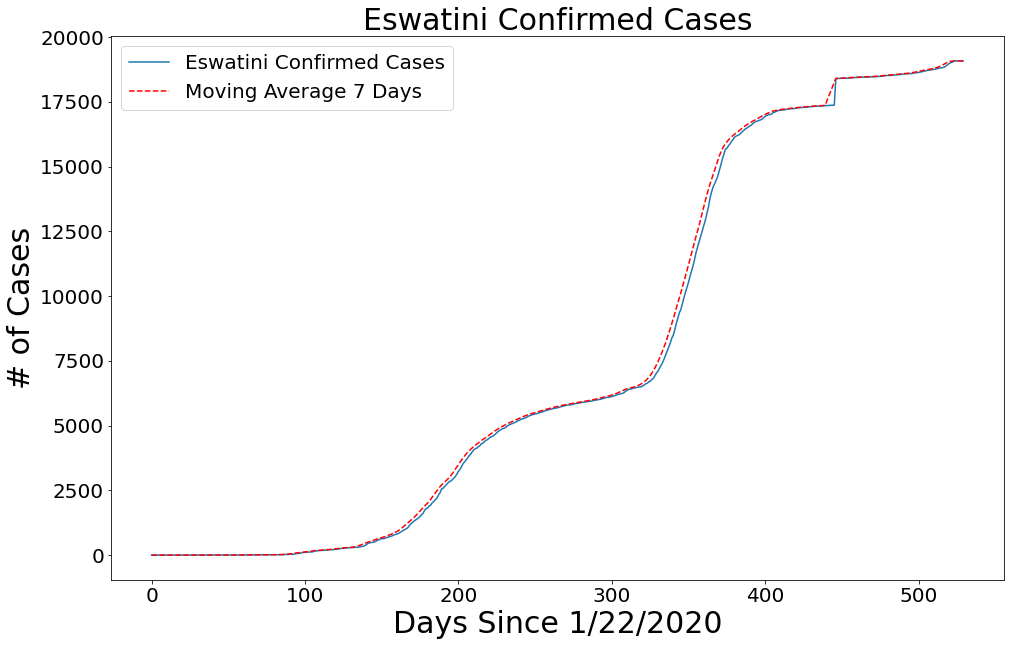

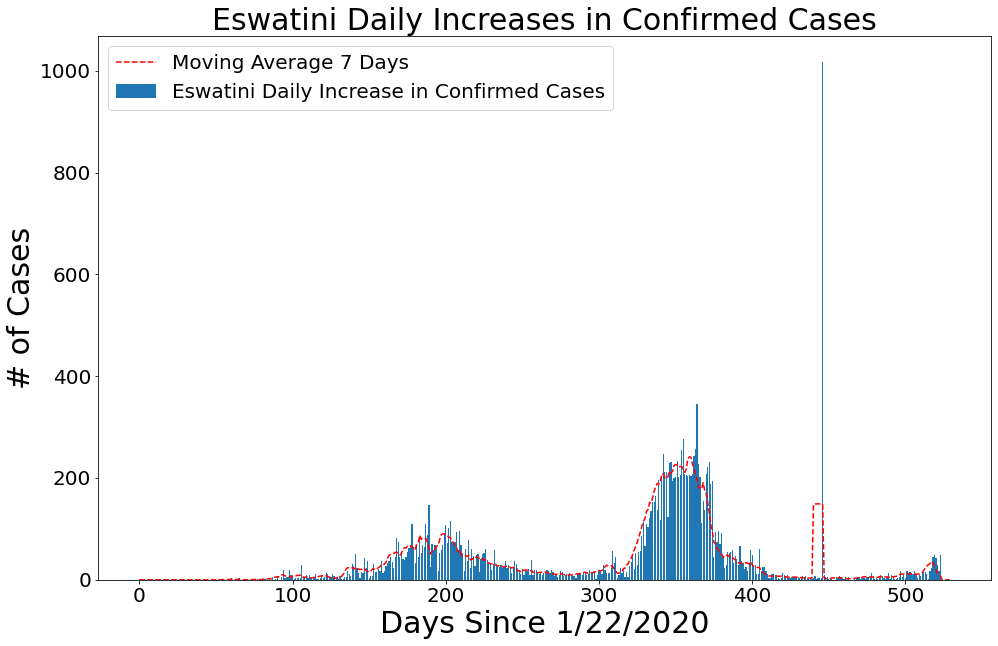

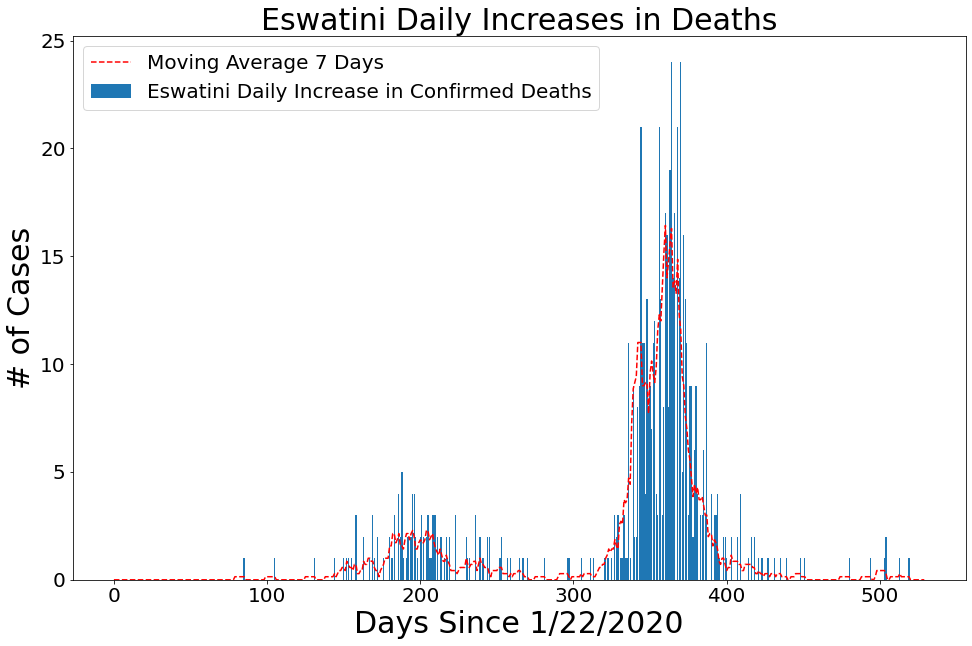

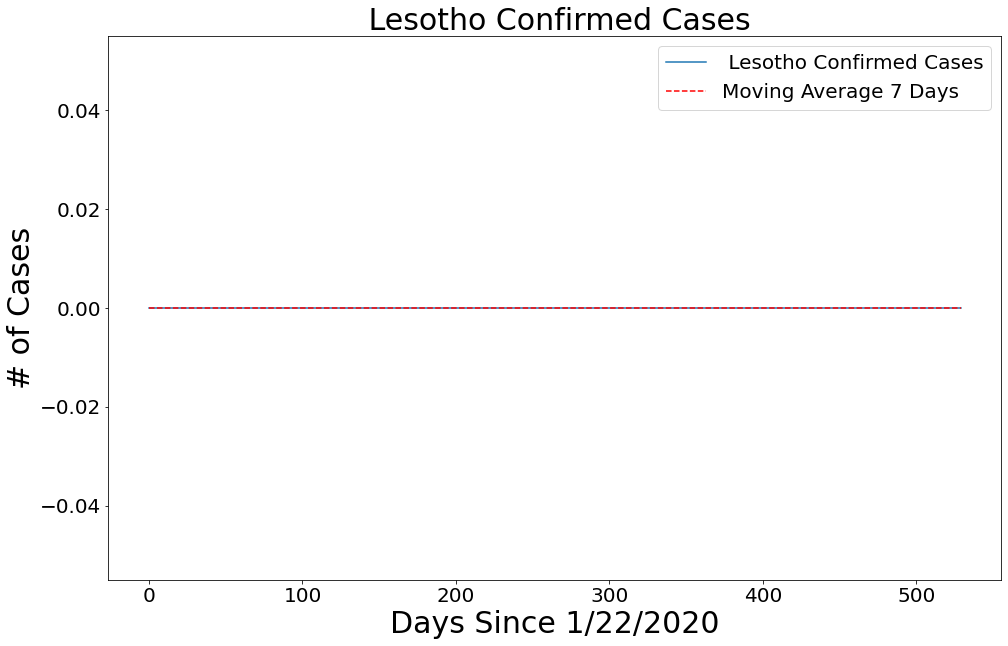

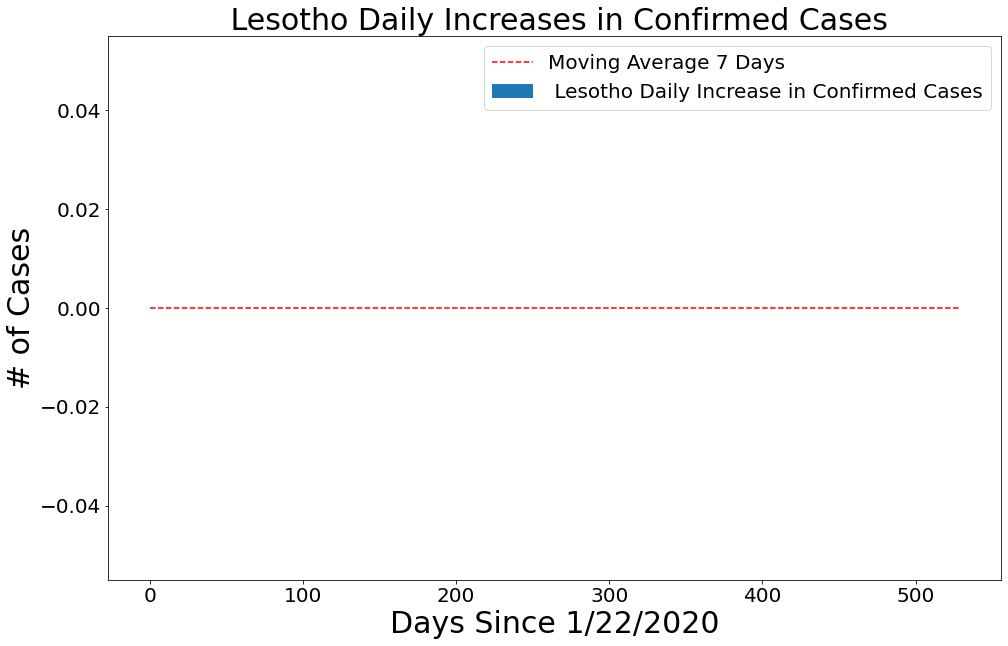

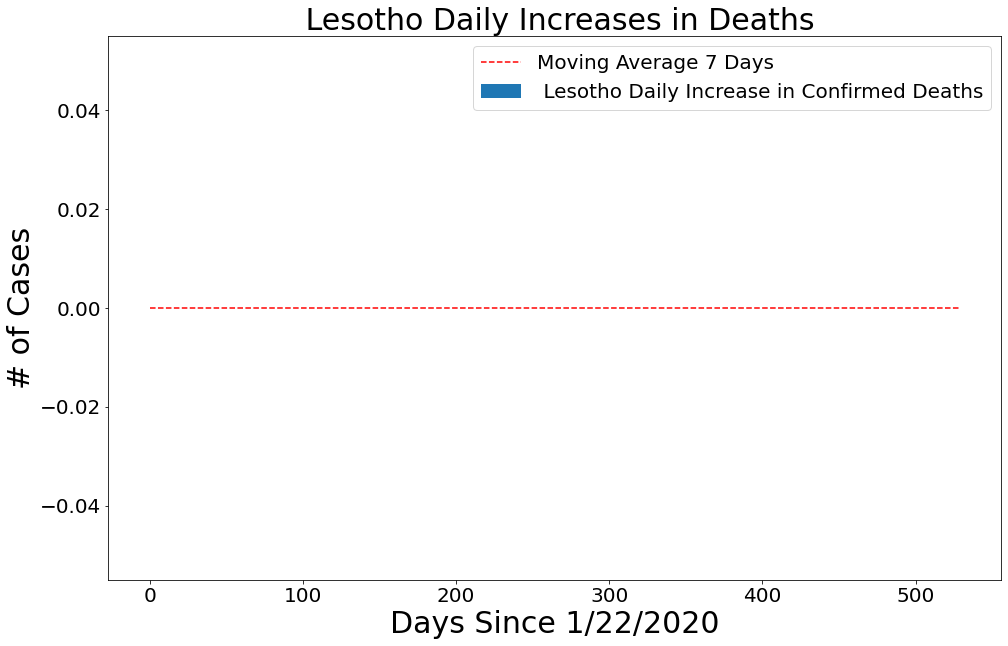

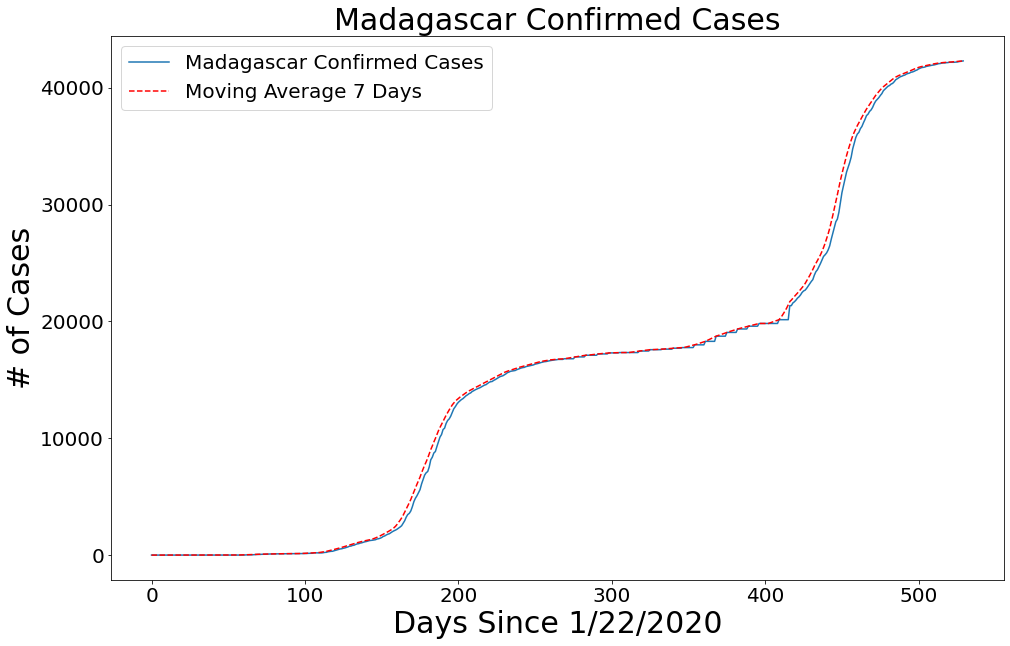

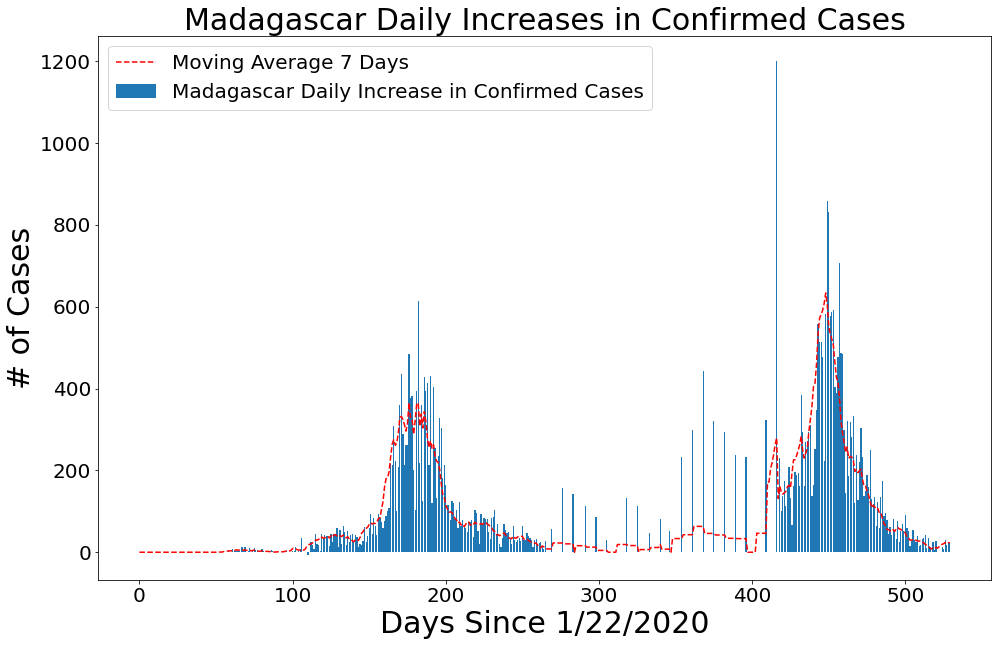

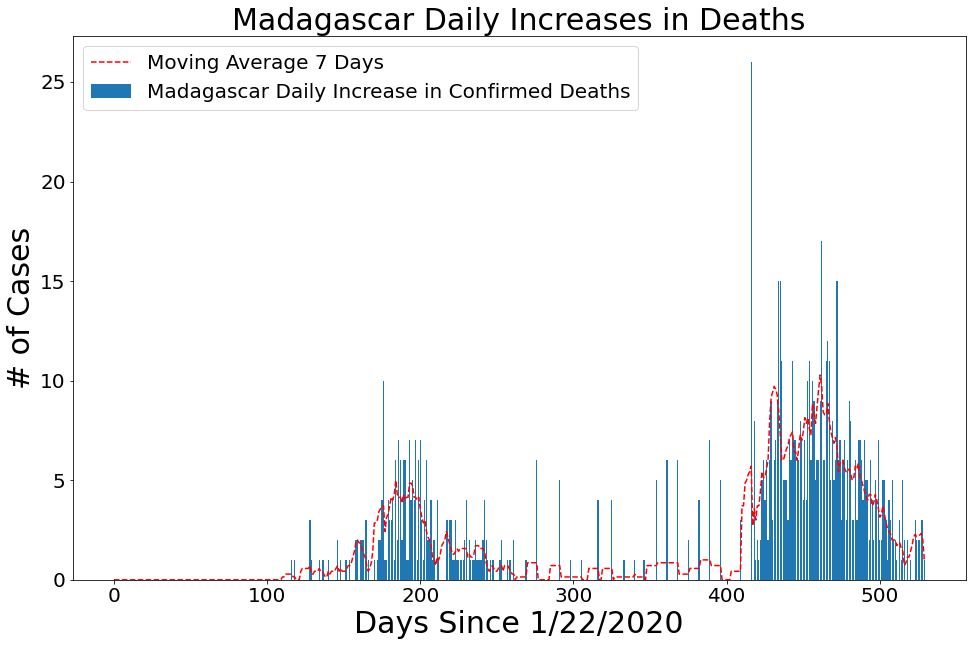

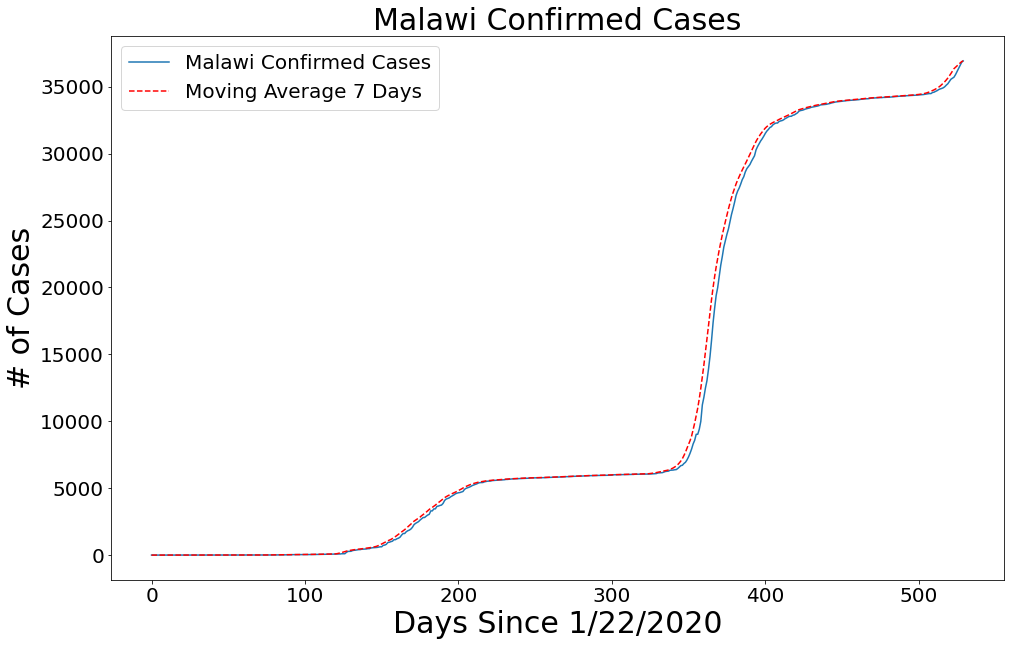

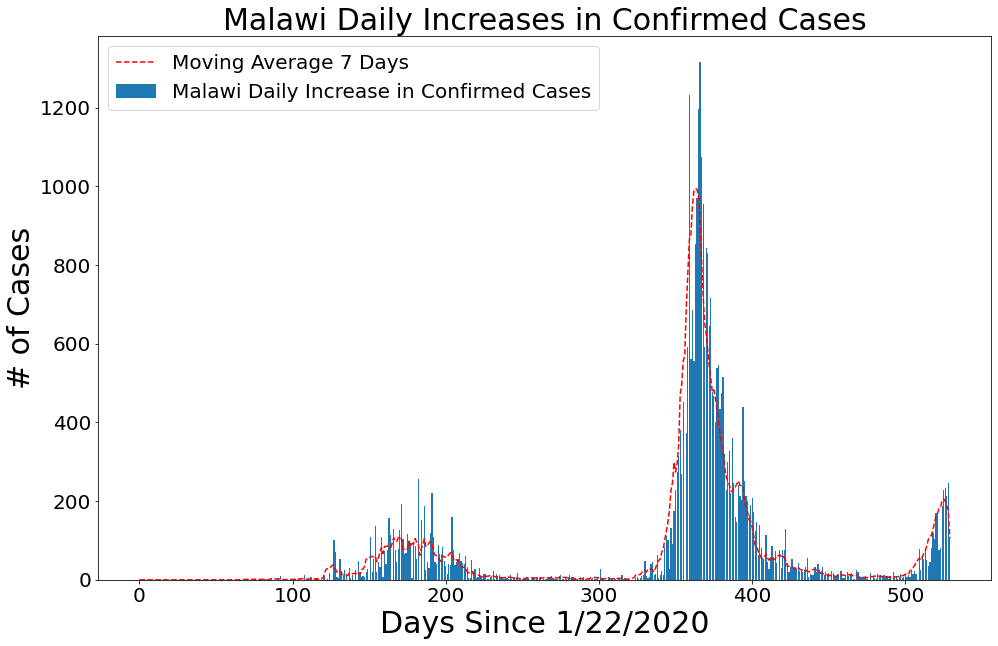

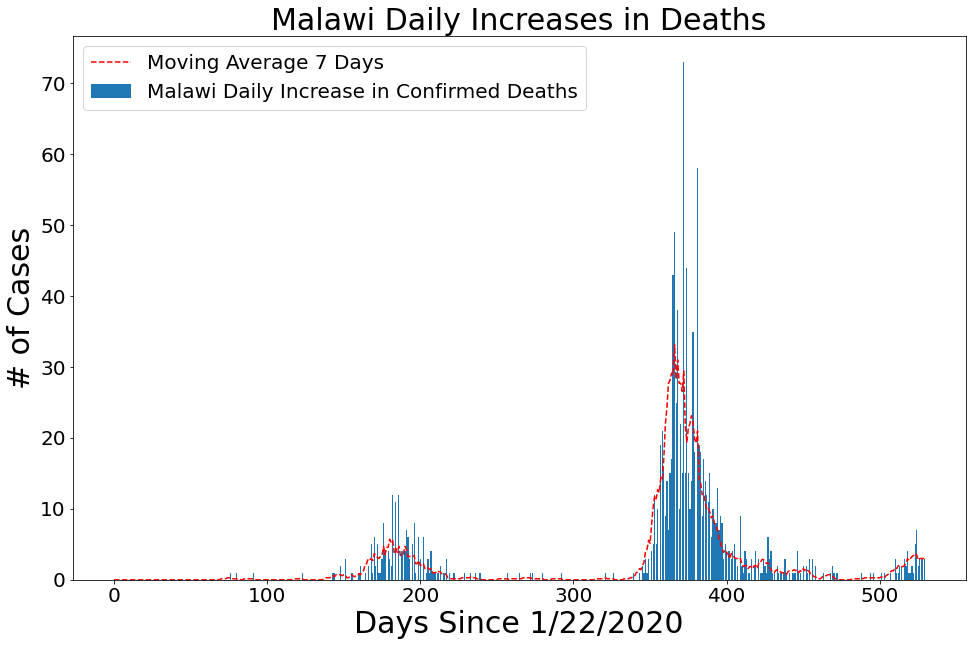

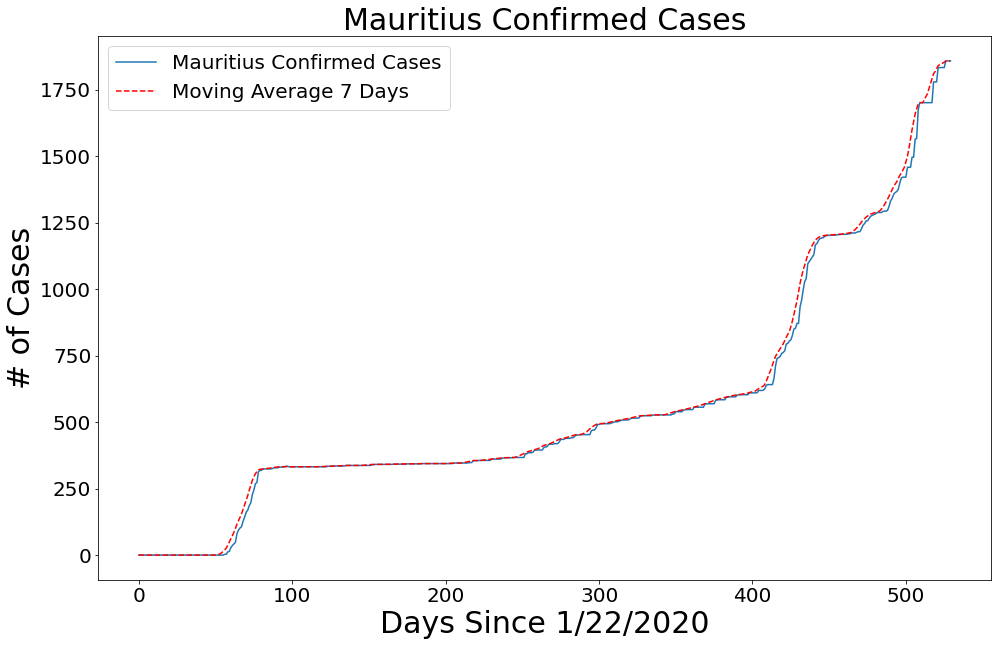

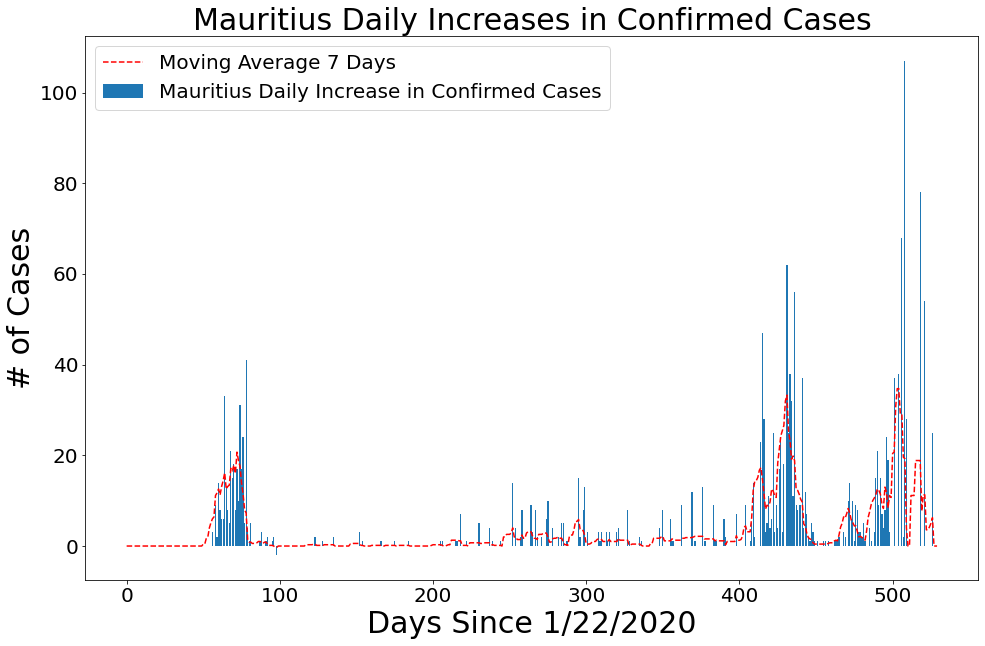

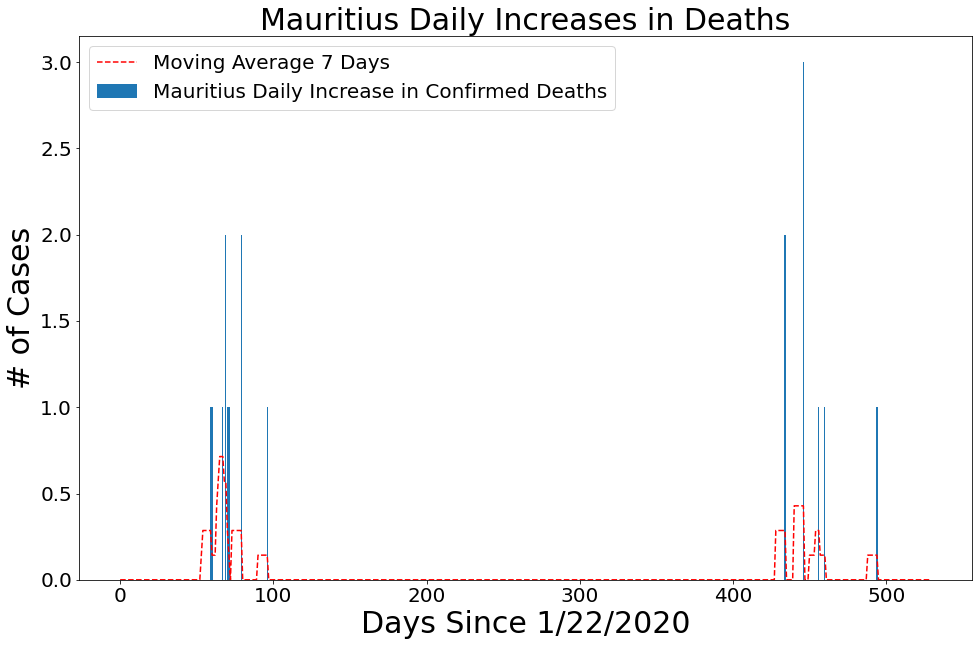

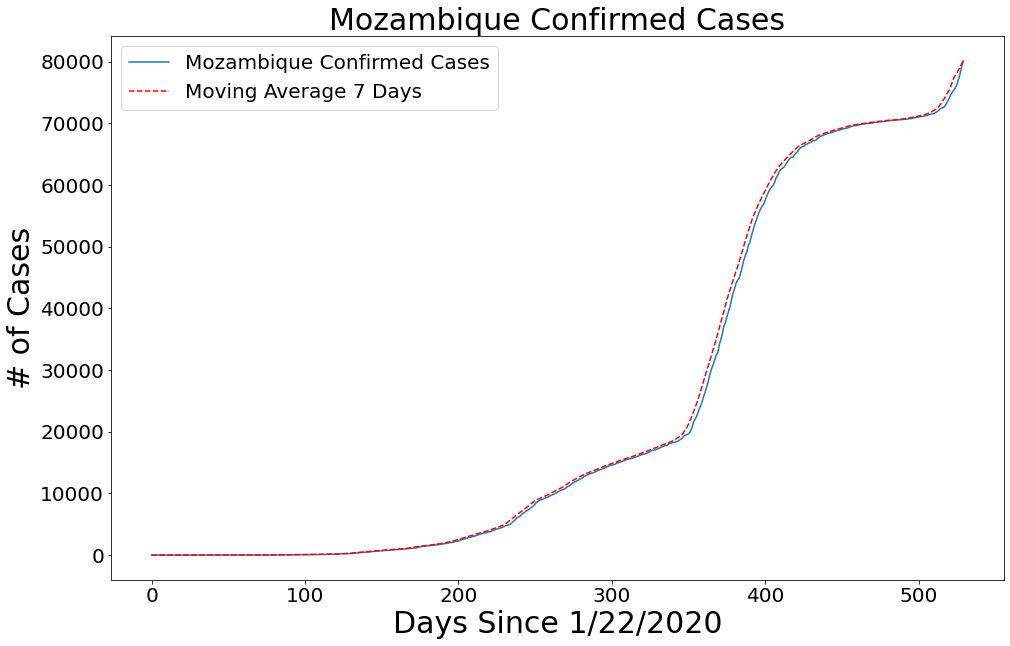

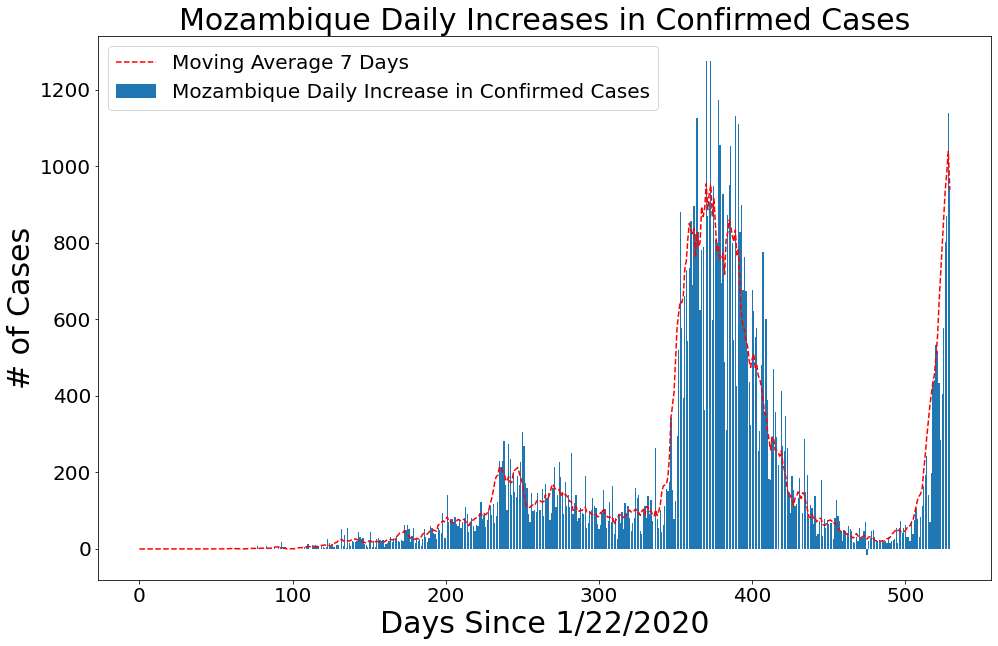

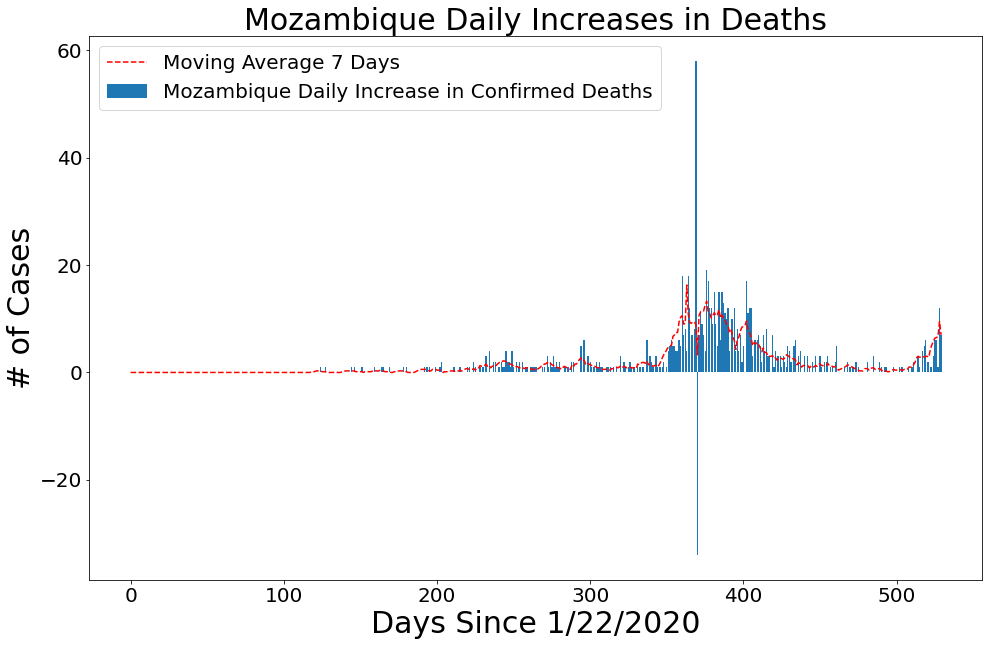

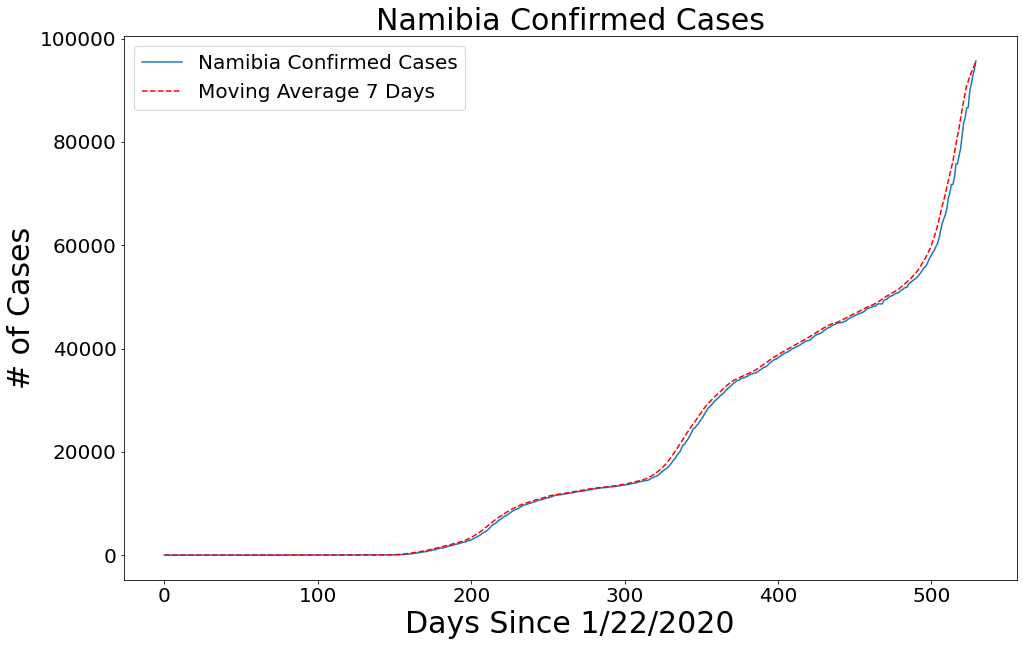

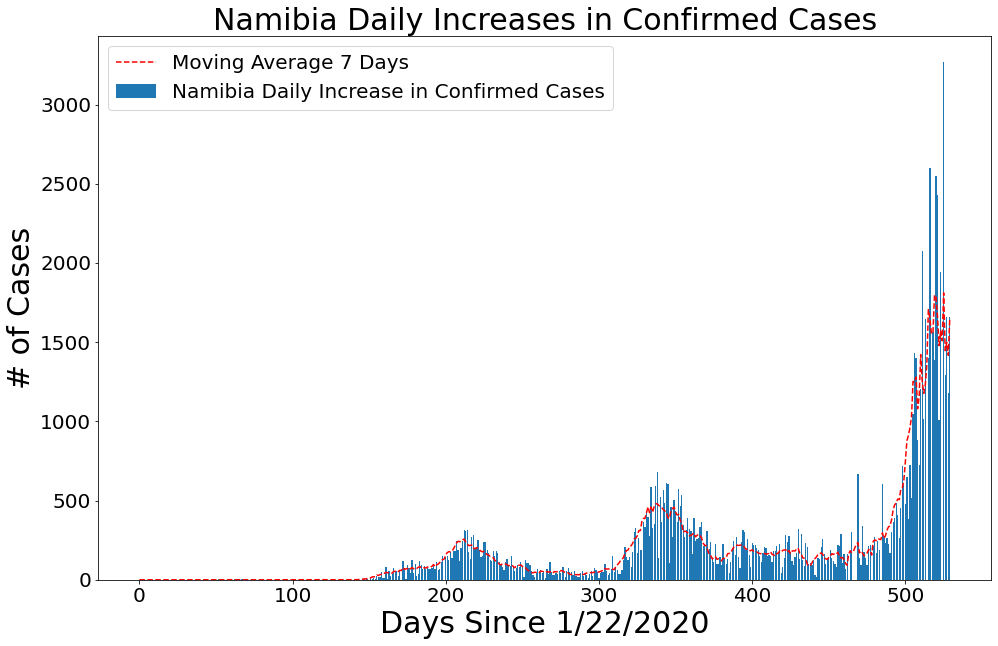

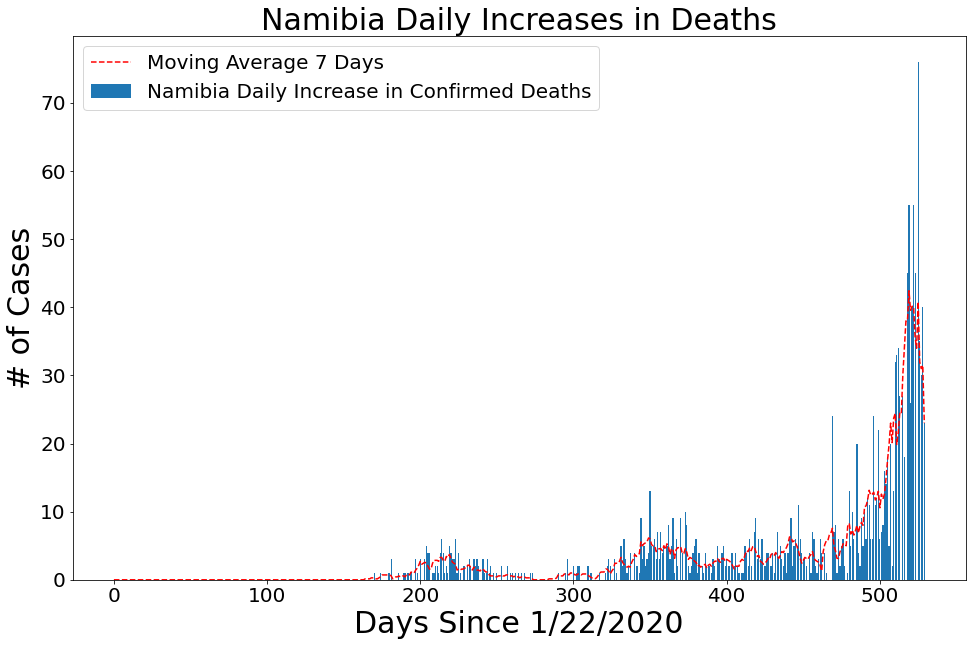

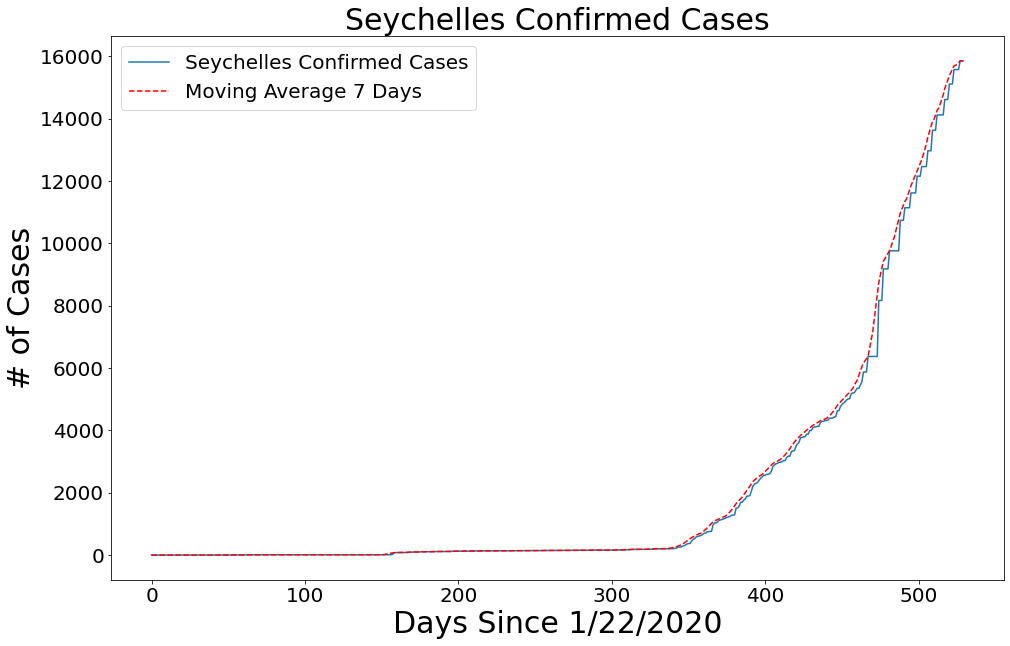

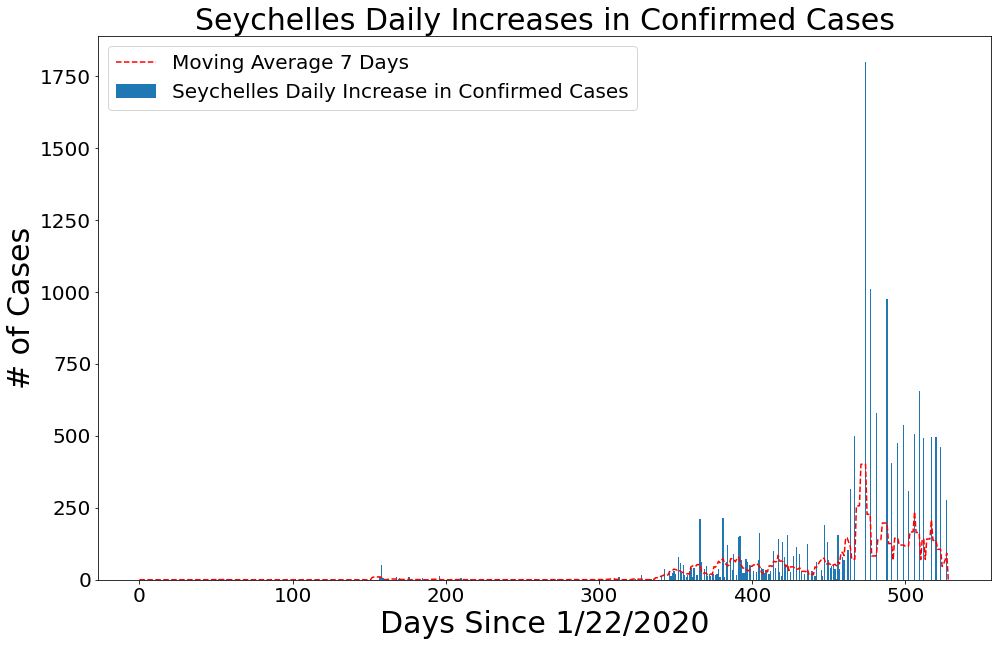

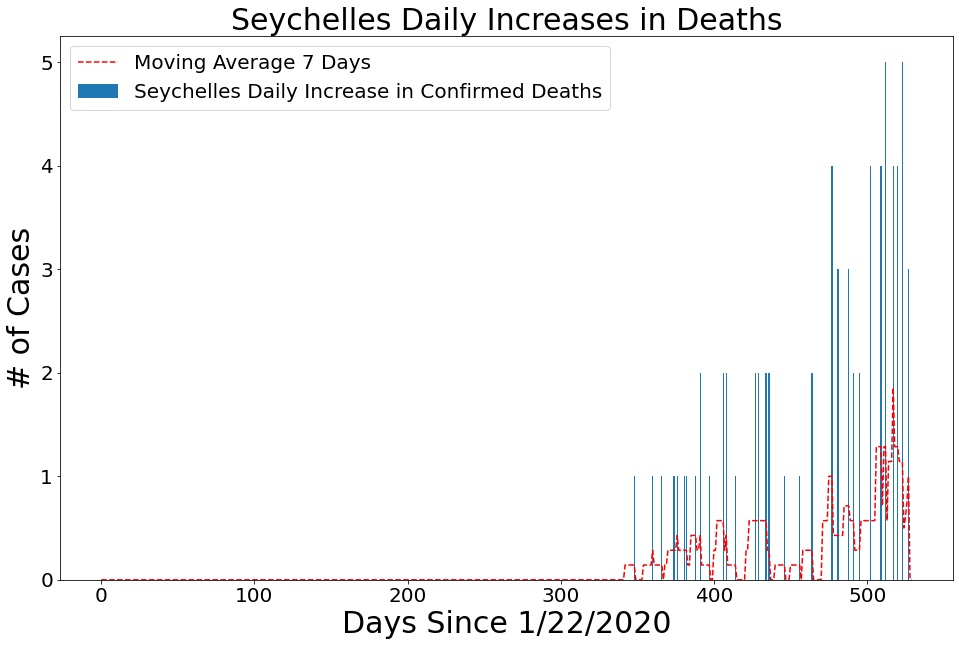

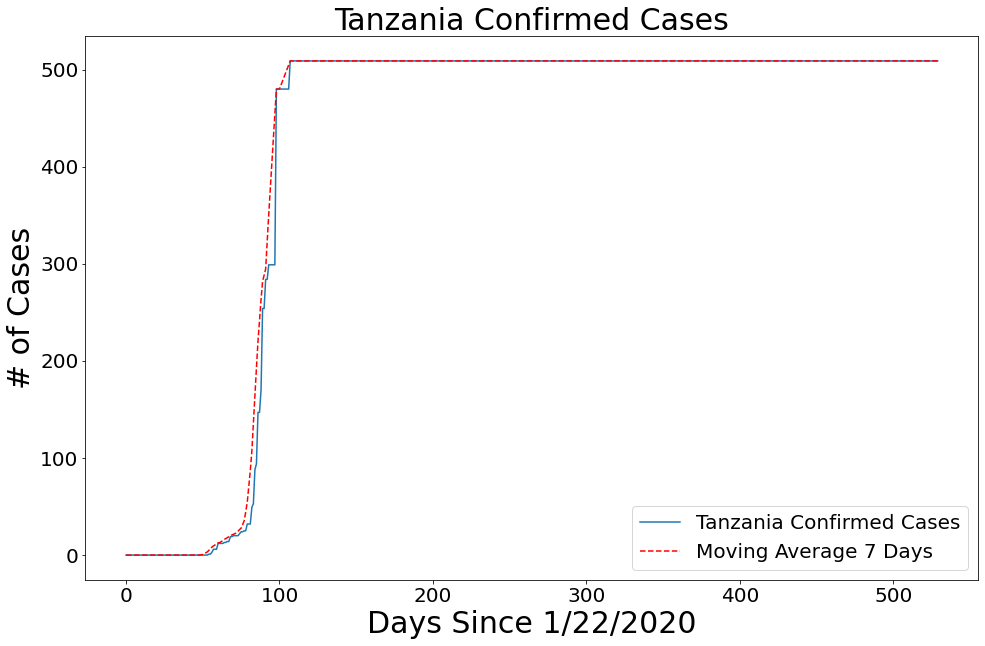

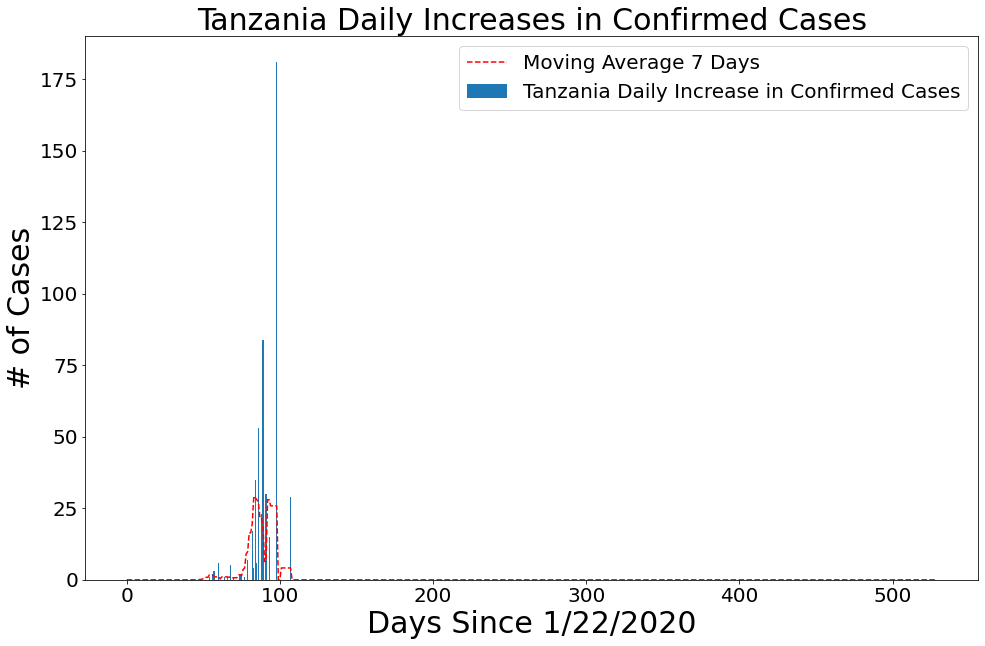

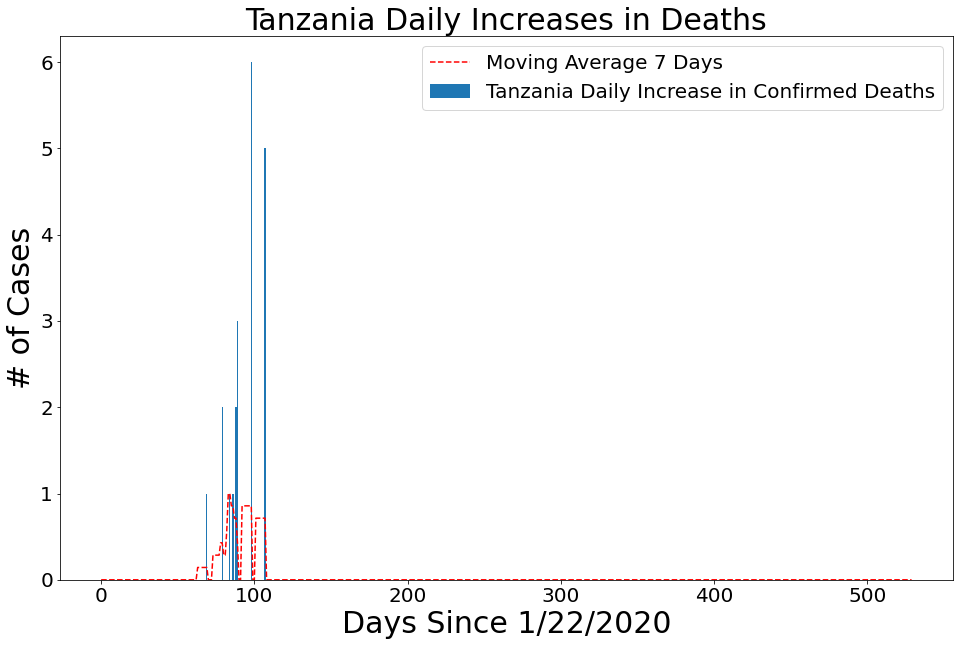

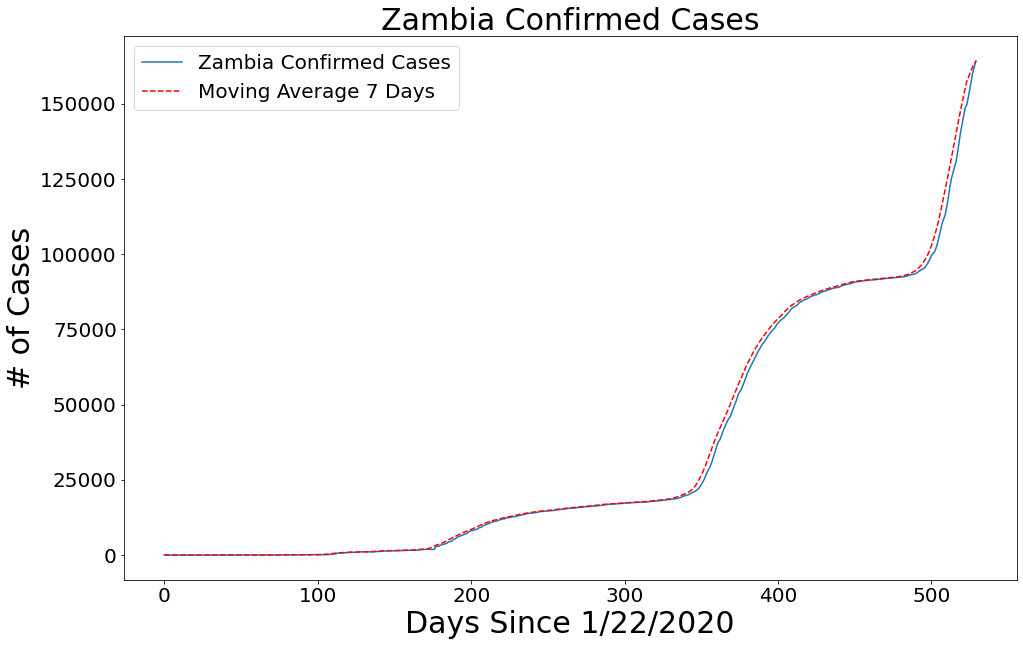

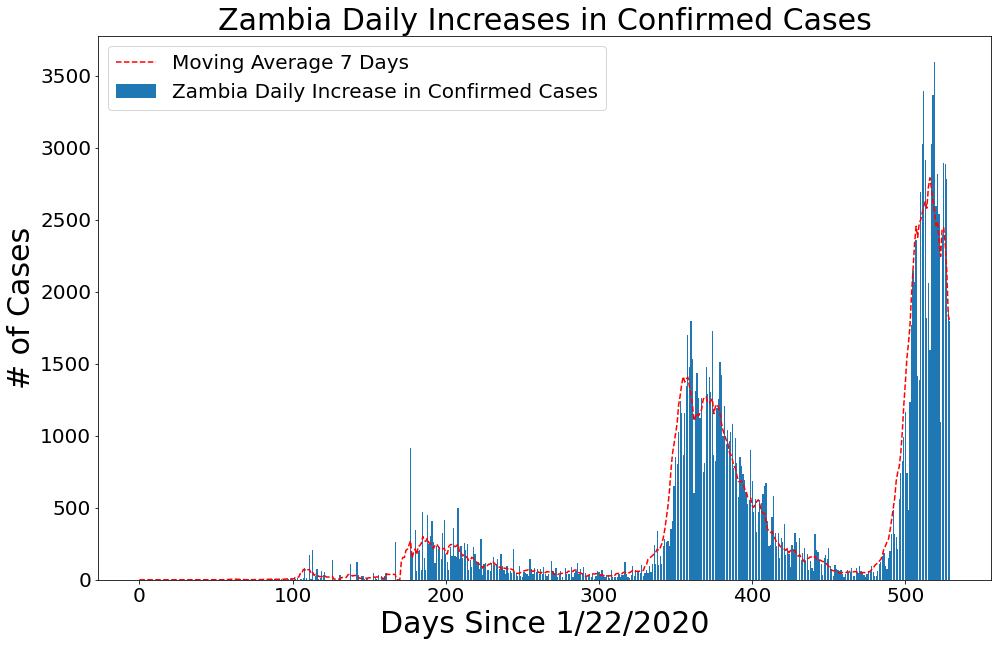

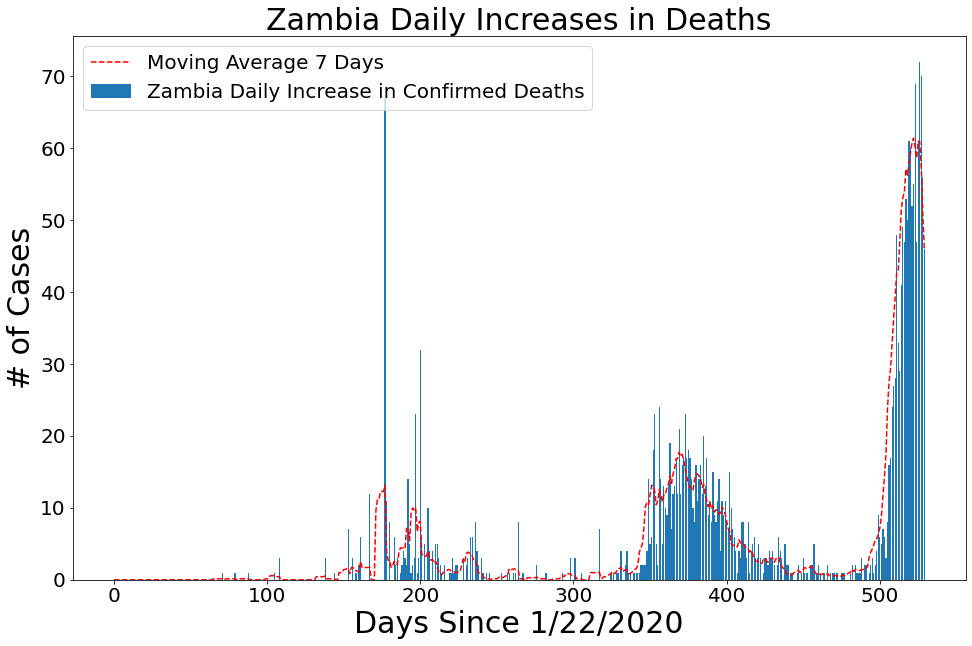

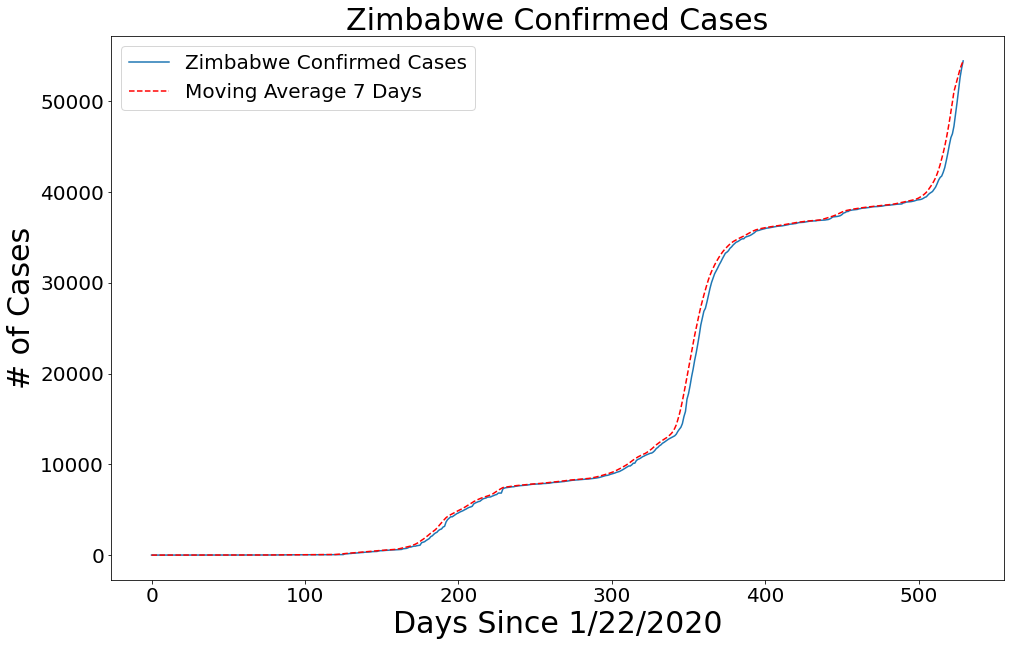

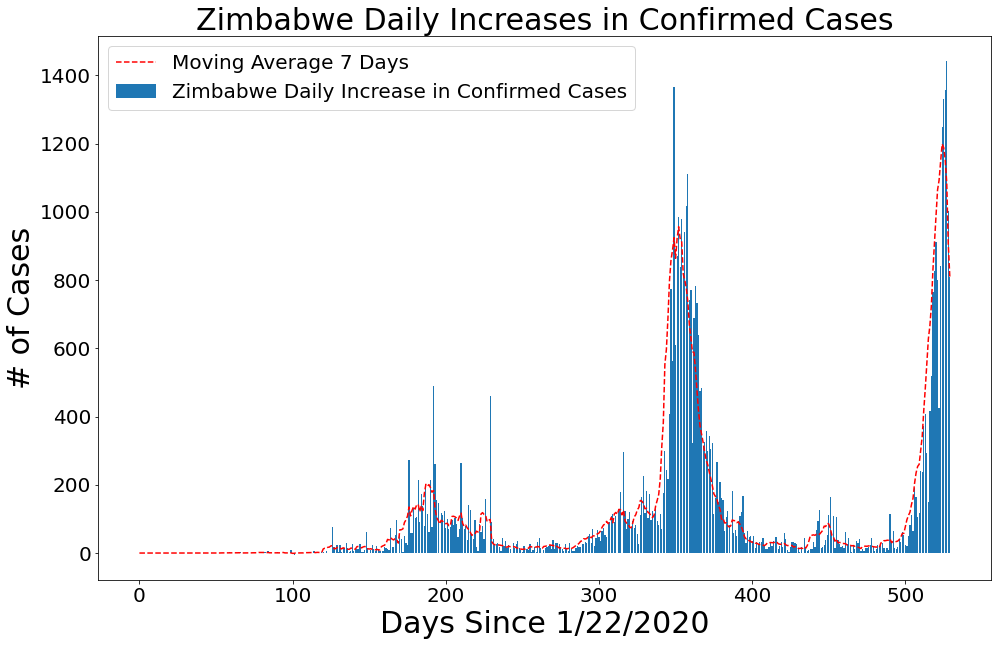

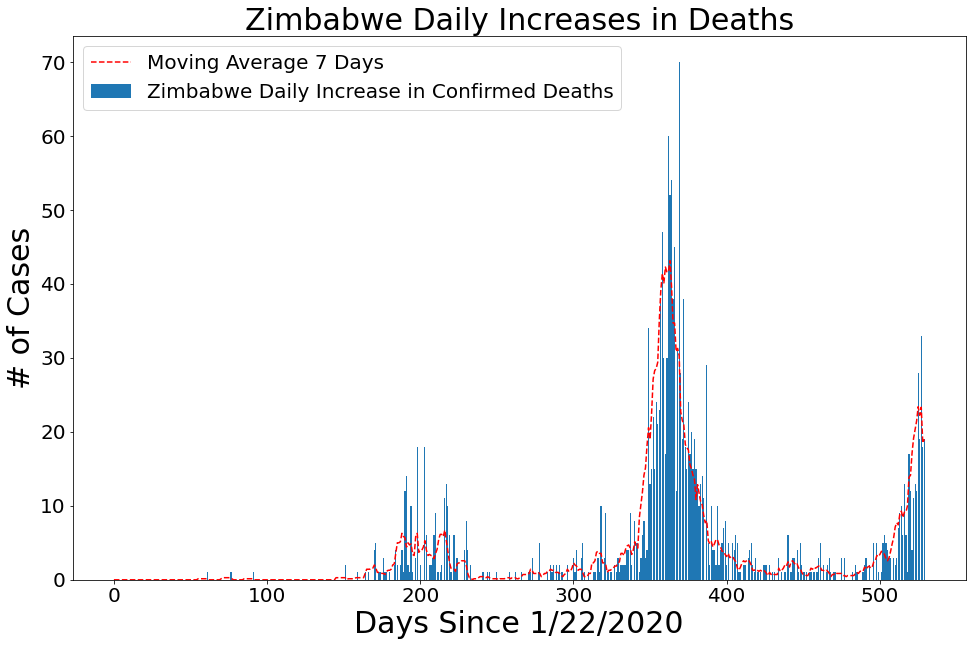

In [58]:
countries = ['Angola', 'Botswana', 'Comoros', 'South Africa', 'Eswatini', ' Lesotho',
             'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'Seychelles', 'Tanzania', 'Zambia', 'Zimbabwe']

for country in countries:
    country_visualizations(country)

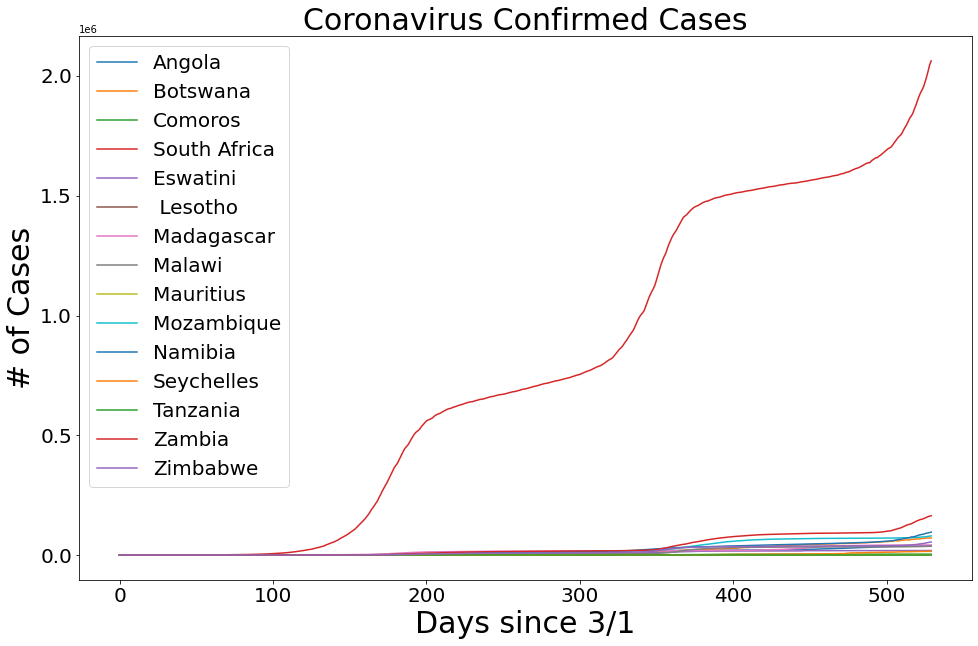

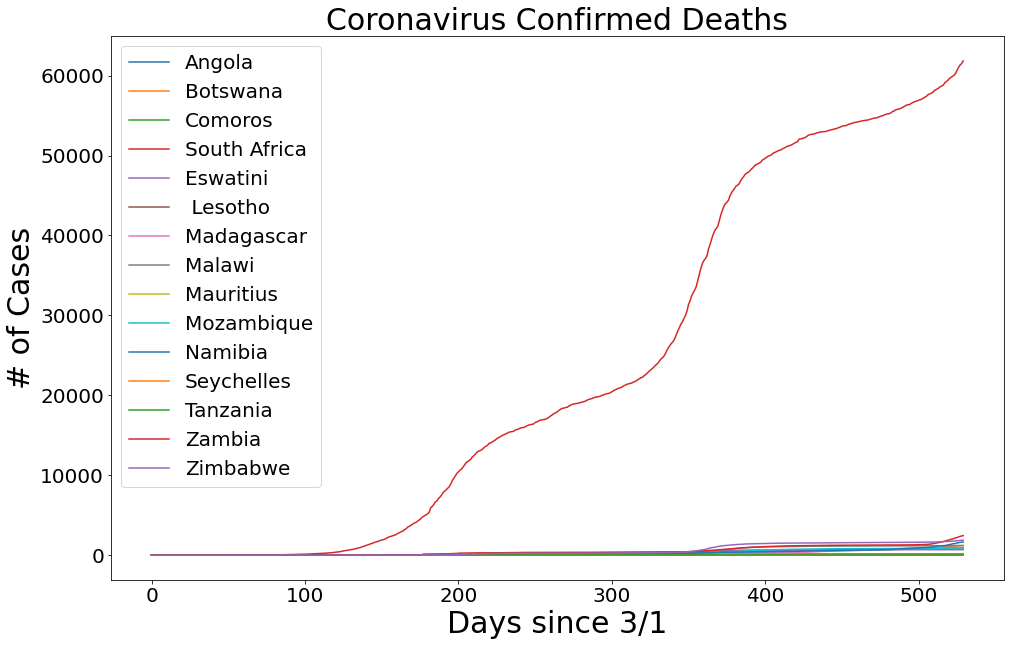

In [59]:
# Countries Comparison
# removed redundant code

compare_countries = ['Angola', 'Botswana', 'Comoros', 'South Africa', 'Eswatini', ' Lesotho',
             'Madagascar', 'Malawi', 'Mauritius', 'Mozambique', 'Namibia', 'Seychelles', 'Tanzania', 'Zambia', 'Zimbabwe']
graph_name = ['Coronavirus Confirmed Cases', 'Coronavirus Confirmed Deaths']

for num in range(2):
    plt.figure(figsize=(16, 10))
    for country in compare_countries:
        plt.plot(get_country_info(country)[num])
    plt.legend(compare_countries, prop={'size': 20})
    plt.xlabel('Days since 3/1', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.title(graph_name[num], size=30)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

# Predictions for confirmed coronavirus cases worldwide¶

These three models predict future covid cases on a global level.

The prediction models include

Support Vector Machine
Polynomial Regression
Bayesian Ridge Regression

In [61]:
def plot_predictions(x, y, pred, algo_name, color):
    plt.figure(figsize=(16, 10))
    plt.plot(x, y)
    plt.plot(future_forcast, pred, linestyle='dashed', color=color)
    plt.title('Worldwide Coronavirus Cases Over Time', size=30)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('# of Cases', size=30)
    plt.legend(['Confirmed Cases', algo_name], prop={'size': 20})
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

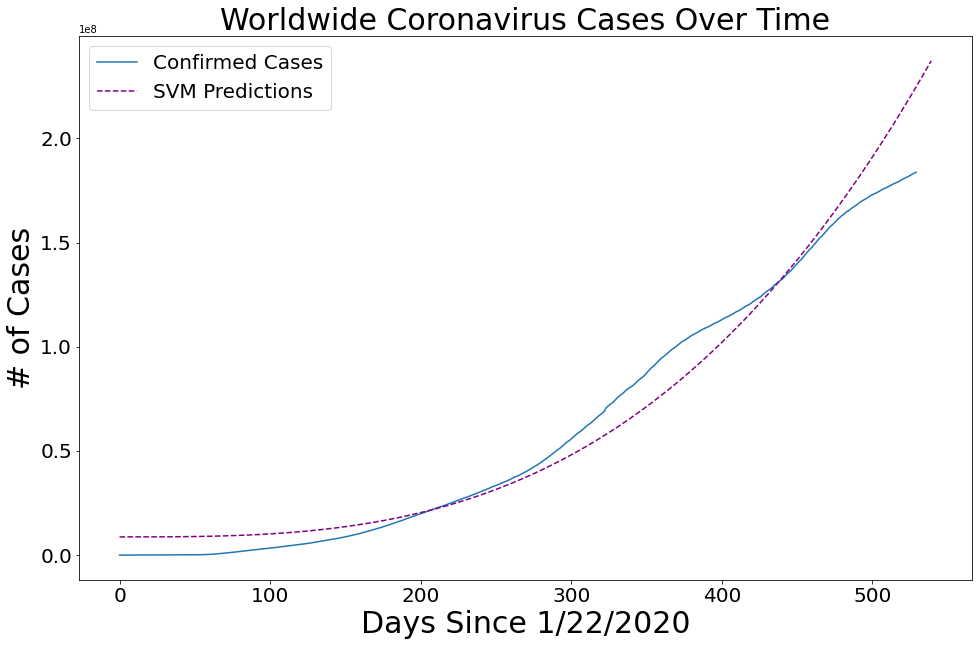

In [62]:
plot_predictions(adjusted_dates, world_cases, svm_pred, 'SVM Predictions', 'purple')

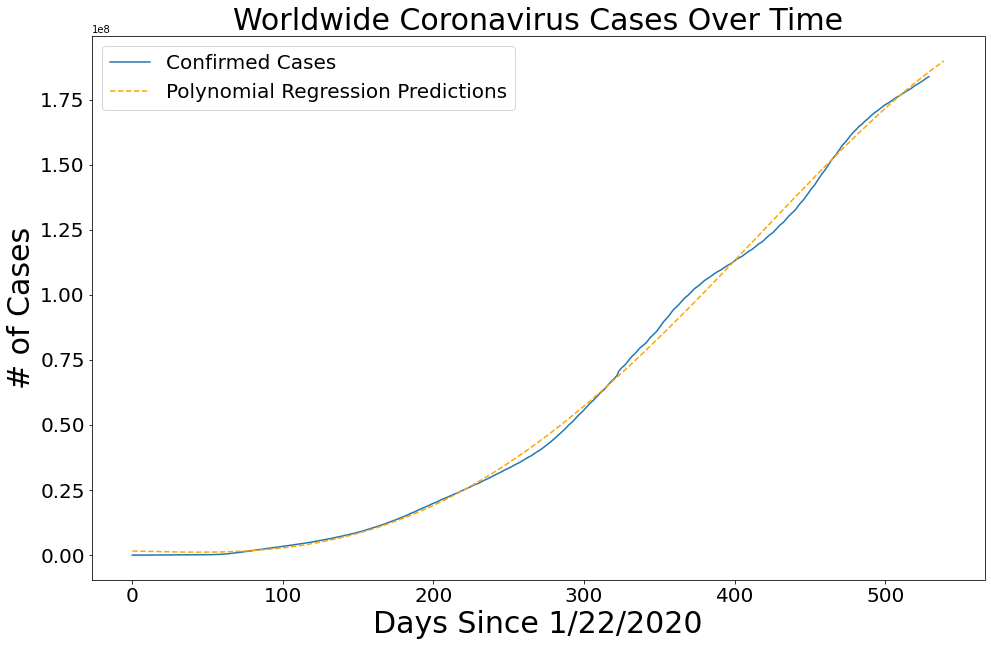

In [63]:
plot_predictions(adjusted_dates, world_cases, linear_pred, 'Polynomial Regression Predictions', 'orange')

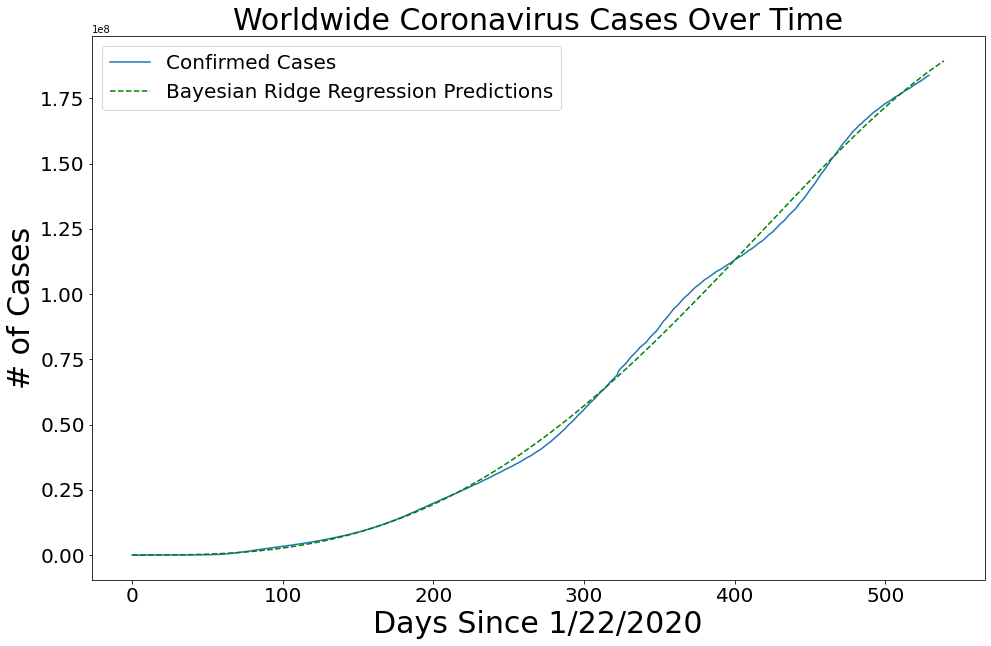

In [64]:
plot_predictions(adjusted_dates, world_cases, bayesian_pred, 'Bayesian Ridge Regression Predictions', 'green')

In [77]:
# Future predictions using SVM 
svm_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'SVM Predicted # of Confirmed Cases Worldwide': np.round(svm_pred[-10:])})
svm_df.style.background_gradient(cmap='Reds')

In [78]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
linear_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Polynomial Predicted # of Confirmed Cases Worldwide': np.round(linear_pred[-10:])})
linear_df.style.background_gradient(cmap='Reds')

In [79]:
# Future predictions using Bayesian Ridge 
bayesian_df = pd.DataFrame({'Date': future_forcast_dates[-10:], 'Bayesian Ridge Predicted # of Confirmed Cases Worldwide': np.round(bayesian_pred[-10:])})
bayesian_df.style.background_gradient(cmap='Reds')

Mortality Rate (worldwide) 

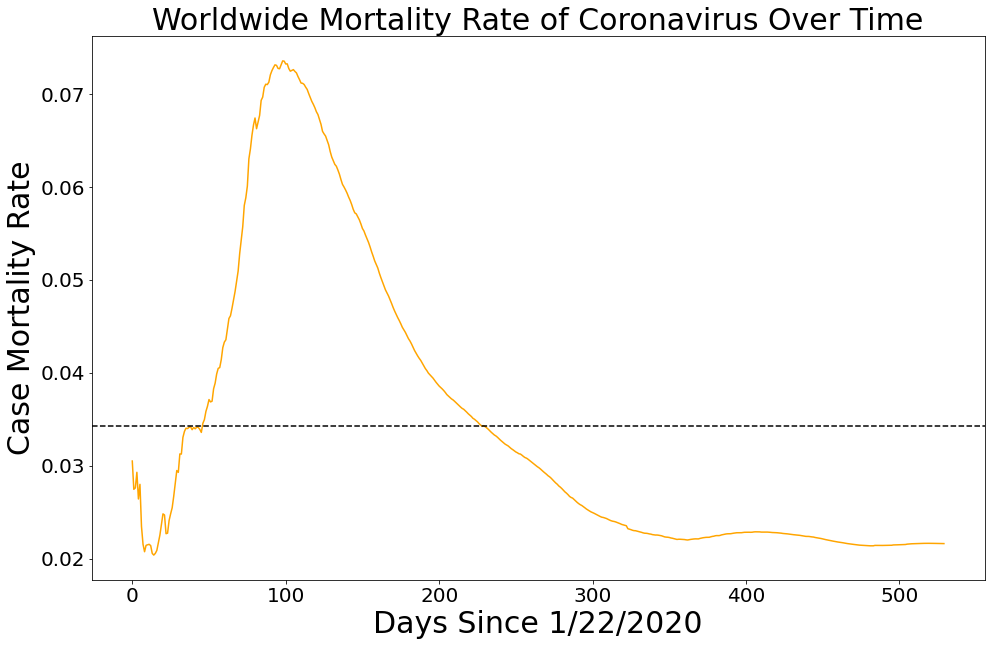

In [81]:
mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 10))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Worldwide Mortality Rate of Coronavirus Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Case Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

# Getting information about countries/regions that have confirmed coronavirus cases

In [83]:
# importing covid-19 daily report dataset
latest_data = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/06-29-2021.csv')
latest_data

FIPS Admin2 Province_State      Country_Region          Last_Update  \
0      NaN    NaN            NaN         Afghanistan  2021-06-30 04:21:41   
1      NaN    NaN            NaN             Albania  2021-06-30 04:21:41   
2      NaN    NaN            NaN             Algeria  2021-06-30 04:21:41   
3      NaN    NaN            NaN             Andorra  2021-06-30 04:21:41   
4      NaN    NaN            NaN              Angola  2021-06-30 04:21:41   
...    ...    ...            ...                 ...                  ...   
3982   NaN    NaN            NaN             Vietnam  2021-06-30 04:21:41   
3983   NaN    NaN            NaN  West Bank and Gaza  2021-06-30 04:21:41   
3984   NaN    NaN            NaN               Yemen  2021-06-30 04:21:41   
3985   NaN    NaN            NaN              Zambia  2021-06-30 04:21:41   
3986   NaN    NaN            NaN            Zimbabwe  2021-06-30 04:21:41   

            Lat       Long_  Confirmed  Deaths  Recovered   Active  \
0     33.939110   67.709953     117158    4794    70016.0  42348.0   
1     41.153300   20.168300     132514    2456   130002.0     56.0   
2     28.033900    1.659600     139229    3708    96815.0  38706.0   
3     42.506300    1.521800      13900     127    13717.0     56.0   
4    -11.202700   17.873900      38682     894    33079.0   4709.0   
...         ...         ...        ...     ...        ...      ...   
3982  14.058324  108.277199      16507      80     6764.0   9663.0   
3983  31.952200   35.233200     313851    3561   307892.0   2398.0   
3984  15.552727   48.516388       6918    1361     4055.0   1502.0   
3985 -13.133897   27.849332     152056    2138   128312.0  21606.0   
3986 -19.015438   29.154857      48533    1761    38323.0   8449.0   

            Combined_Key  Incident_Rate  Case_Fatality_Ratio  
0            Afghanistan     300.958112             4.091910  
1                Albania    4604.698033             1.853389  
2                Algeria     317.504421             2.663238  
3                Andorra   17990.034298             0.913669  
4                 Angola     117.695140             2.311152  
...                  ...            ...                  ...  
3982             Vietnam      16.958332             0.484643  
3983  West Bank and Gaza    6152.233027             1.134615  
3984               Yemen      23.194553            19.673316  
3985              Zambia     827.112510             1.406061  
3986            Zimbabwe     326.537296             3.628459  

[3987 rows x 14 columns]

In [85]:
unique_countries =  list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [87]:
import operator

country_confirmed_cases = []
country_death_cases = [] 
country_active_cases = []
# country_recovery_cases = []
country_incidence_rate = [] 
country_mortality_rate = [] 

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases > 0:
        country_confirmed_cases.append(cases)
    else:
        no_cases.append(i)
        
for i in no_cases:
    unique_countries.remove(i)
    
# sort countries by the number of confirmed cases
unique_countries = [k for k, v in sorted(zip(unique_countries, country_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
for i in range(len(unique_countries)):
    country_confirmed_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
#     country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Active'].sum())
    country_incidence_rate.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Incident_Rate'].sum())
    country_mortality_rate.append(country_death_cases[i]/country_confirmed_cases[i])

# Data table¶
This shows covid data for countries like Usa, South Africa, Eswatini. The table includes the number of confirmed cases, deaths, active cases, incidence rate, and mortality rate.

In [88]:
country_df = pd.DataFrame({'Country Name': unique_countries, 'Number of Confirmed Cases': [format(int(i), ',d') for i in country_confirmed_cases],
                          'Number of Deaths': [format(int(i), ',d') for i in country_death_cases], 
                          'Number of Active Cases' : [format(int(i), ',d') for i in country_active_cases], 'Incidence Rate' : country_incidence_rate,
                          'Mortality Rate': country_mortality_rate})
# number of cases per country/region

country_df.style.background_gradient(cmap='Oranges')

In [102]:
# return the data table with province/state info for a given country
def country_table(country_name):
    states = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    state_confirmed_cases = []
    state_death_cases = [] 
    state_active = [] 
    state_incidence_rate = [] 
    state_mortality_rate = [] 

    no_cases = [] 
    for i in states:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            state_confirmed_cases.append(cases)
        else:
            no_cases.append(i)

    # remove areas with no confirmed cases
    for i in no_cases:
        states.remove(i)

    states = [k for k, v in sorted(zip(states, state_confirmed_cases), key=operator.itemgetter(1), reverse=True)]
    for i in range(len(states)):
        state_confirmed_cases[i] = latest_data[latest_data['Province_State']==states[i]]['Confirmed'].sum()
        state_death_cases.append(latest_data[latest_data['Province_State']==states[i]]['Deaths'].sum())
        state_active.append(latest_data[latest_data['Province_State']==states[i]]['Active'].sum())
        state_incidence_rate.append(latest_data[latest_data['Province_State']==states[i]]['Incident_Rate'].sum())
        state_mortality_rate.append(state_death_cases[i]/state_confirmed_cases[i])
        
      
    state_df = pd.DataFrame({'State Name': states, 'Number of Confirmed Cases': [format(int(i), ',d') for i in state_confirmed_cases],
                              'Number of Deaths': [format(int(i), ',d') for i in state_death_cases], 'Number of Active Cases' : [format(int(i), ',d') for i in state_active], 
                             'Incidence Rate' : state_incidence_rate, 'Mortality Rate': state_mortality_rate})
    # number of cases per country/region
    return state_df

In [104]:
us_table = country_table('US')
us_table.style.background_gradient(cmap='Oranges')

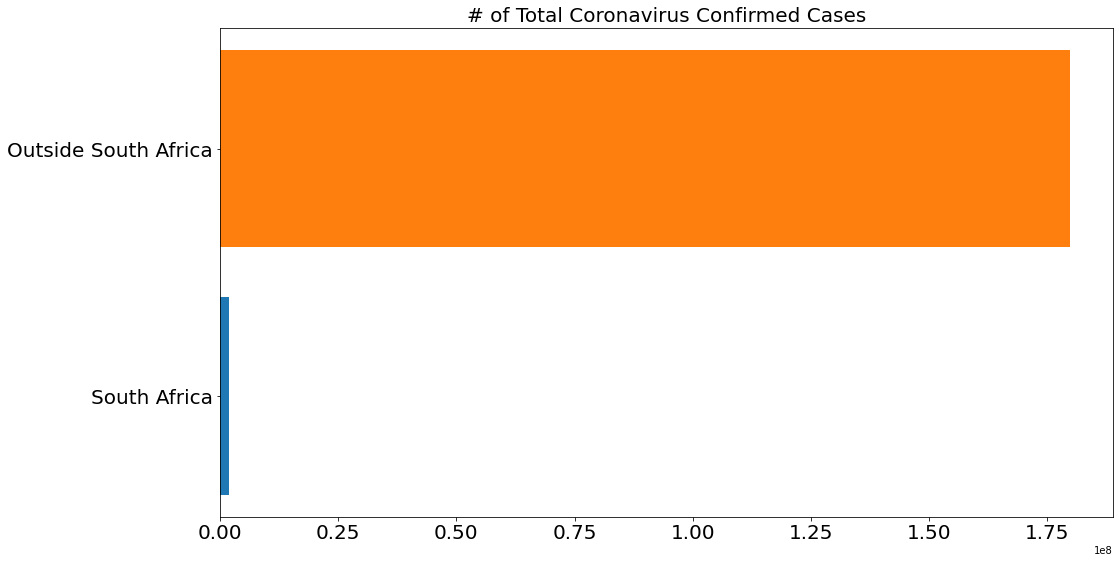

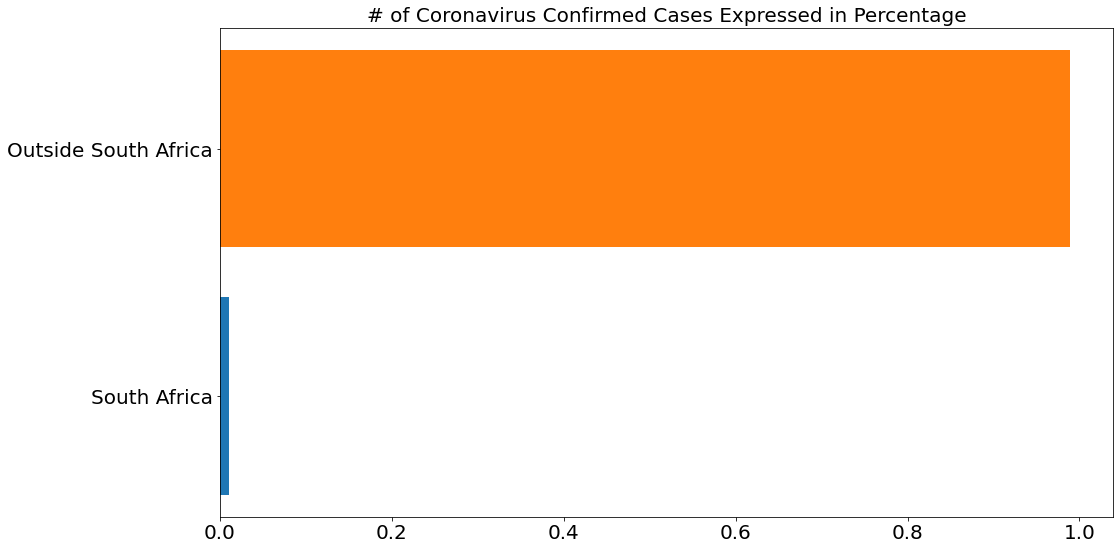

In [111]:
total_world_cases = np.sum(country_confirmed_cases)
sa_confirmed = latest_data[latest_data['Country_Region']=='South Africa']['Confirmed'].sum()
outside_sa_confirmed = total_world_cases - sa_confirmed

plt.figure(figsize=(16, 9))
plt.barh('South Africa', us_confirmed)
plt.barh('Outside South Africa', outside_us_confirmed)
plt.title('# of Total Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.barh('South Africa', us_confirmed/total_world_cases)
plt.barh('Outside South Africa', outside_us_confirmed/total_world_cases)
plt.title('# of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [113]:
print('Outside South Africa {} cases ({}%):'.format(outside_sa_confirmed, np.round((outside_sa_confirmed/total_world_cases)*100, 1)))
print('South Africa {} cases ({}%)'.format(us_confirmed, np.round((sa_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside South Africa 179856065 cases (98.9%):
South Africa 1954466 cases (1.1%)
Total: 181810531 cases


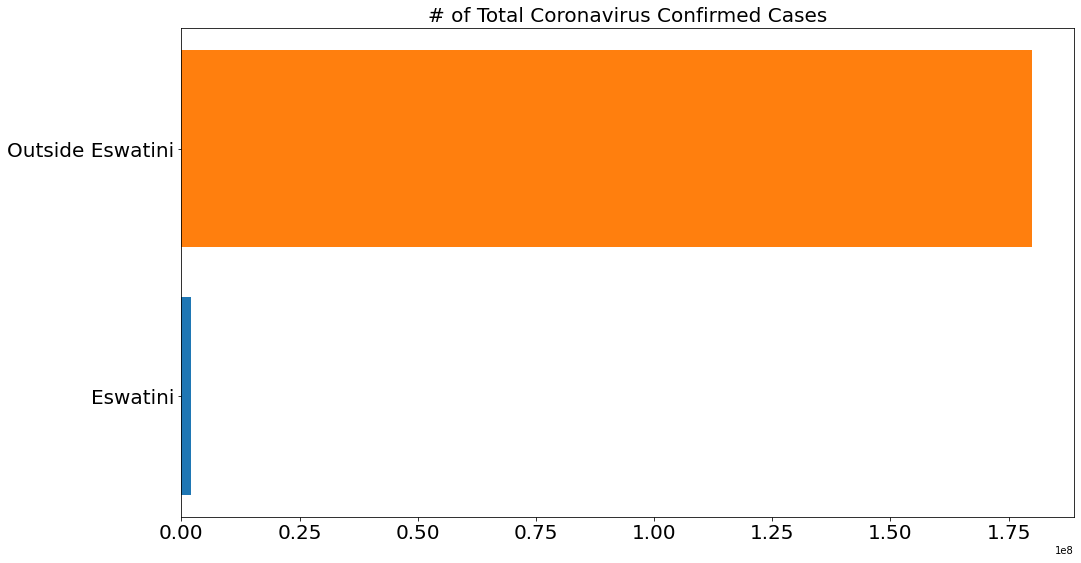

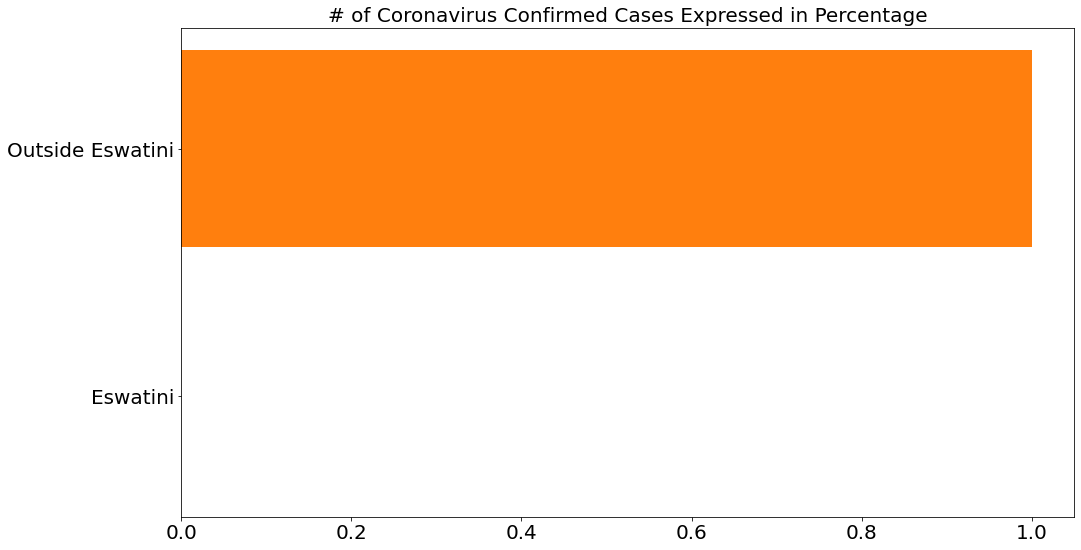

In [116]:
total_world_cases = np.sum(country_confirmed_cases)
es_confirmed = latest_data[latest_data['Country_Region']=='Eswatini']['Confirmed'].sum()
outside_es_confirmed = total_world_cases - es_confirmed

plt.figure(figsize=(16, 9))
plt.barh('Eswatini', us_confirmed)
plt.barh('Outside Eswatini', outside_us_confirmed)
plt.title('# of Total Coronavirus Confirmed Cases', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()


plt.figure(figsize=(16, 9))
plt.barh('Eswatini', es_confirmed/total_world_cases)
plt.barh('Outside Eswatini', outside_es_confirmed/total_world_cases)
plt.title('# of Coronavirus Confirmed Cases Expressed in Percentage', size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [117]:
print('Outside Eswatini {} cases ({}%):'.format(outside_es_confirmed, np.round((outside_es_confirmed/total_world_cases)*100, 1)))
print('Eswatini {} cases ({}%)'.format(es_confirmed, np.round((es_confirmed/total_world_cases)*100, 1)))
print('Total: {} cases'.format(total_world_cases))

Outside Eswatini 181791447 cases (100.0%):
Eswatini 19084 cases (0.0%)
Total: 181810531 cases
